In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.HEATING_OIL)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,HO,-101062.0,60660.0,161722.0,10738.0,52627.0,41889.0,-6949.0,-1096.0,...,116650.0,-221825.0,-247835.0,104997.0,-22.00,10.81,-22.15,5.59,-22.31,4.55
808,2025-07-01,HO,-104727.0,71449.0,176176.0,12898.0,54458.0,41560.0,-3665.0,-6949.0,...,-221825.0,NaN,104997.0,NaN,10.81,NaN,5.59,NaN,4.55,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean     -88936.087763
std       27763.539642
min     -159660.000000
25%     -107553.000000
50%      -87631.000000
75%      -69721.000000
max      -13850.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count      809.000000
mean     11310.650185
std      20265.543668
min     -34954.000000
25%      -2699.000000
50%      12014.000000
75%      24770.000000
max      67696.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(231)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['Commercial_NetPosition_to_openinterest_change',
                         'CommercialLongPosition_to_openinterest_change',
                         'CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("ho_cot_comm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'Commercial_NetPosition_change': ['prior_report_CommercialShortPosition_change',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'F2_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change'],
 'CommercialLongPosition_change': ['prior_5D_F2_OI_change',
  'F1_RolledPrice_change',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_5D_AGG_OI_change'],
 'CommercialShortPosition_change': ['F1_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change',
  'prior_report_CommercialShortPosition_change',
  'prior_5D_AGG_OI_change'],
 'Commercial_NetPosition_to_openinterest_change': ['F2_RolledPrice_rolling_20D_volatility',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'CommercialLongPosition_to_openinterest_change': ['prior_cumulative_5D_F2_Volume_change',
  'F1_RolledPrice_change',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_5D_AGG_OI_chan

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 20:48:04,956] A new study created in memory with name: no-name-15715fba-a788-4532-9aa4-7c169f967543
Best trial: 1. Best value: 0.227812:   1%|       | 1/80 [00:01<02:03,  1.57s/it]

[I 2025-08-20 20:48:06,531] Trial 0 finished with value: 0.22779723510932878 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.22779723510932878.
[I 2025-08-20 20:48:06,574] Trial 1 finished with value: 0.22781219627651858 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.22781219627651858.


Best trial: 2. Best value: 0.523678:   4%|▎      | 3/80 [00:05<02:20,  1.83s/it]

[I 2025-08-20 20:48:10,372] Trial 2 finished with value: 0.5236776756696463 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5236776756696463.


Best trial: 2. Best value: 0.523678:   9%|▌      | 7/80 [00:05<00:39,  1.84it/s]

[I 2025-08-20 20:48:10,649] Trial 3 finished with value: 0.4851287415693664 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5236776756696463.
[I 2025-08-20 20:48:10,691] Trial 4 finished with value: 0.22781310303297442 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5236776756696463.
[I 2025-08-20 20:48:10,734] Trial 5 finished with value: 0.22781219542929362 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5236776756696463.
[I 2025-08-20 20:48:10,773] Trial 6 finished with value: 0.18707030628159602 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5236776756696463.
[I 2025-08-20 20:48:10,805] Trial 7 finished with value: 0.22781219542929362 and p

Best trial: 2. Best value: 0.523678:  11%|▊      | 9/80 [00:06<00:29,  2.42it/s]

[I 2025-08-20 20:48:11,137] Trial 8 finished with value: 0.5124617873556945 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5236776756696463.
[I 2025-08-20 20:48:11,168] Trial 9 finished with value: 0.22781219542929362 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5236776756696463.


Best trial: 10. Best value: 0.523679:  14%|▋    | 11/80 [00:09<01:01,  1.12it/s]

[I 2025-08-20 20:48:14,784] Trial 10 finished with value: 0.5236794806053182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5236794806053182.


Best trial: 11. Best value: 0.523679:  15%|▊    | 12/80 [00:13<01:37,  1.44s/it]

[I 2025-08-20 20:48:18,458] Trial 11 finished with value: 0.5236794806053183 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 11 with value: 0.5236794806053183.


Best trial: 11. Best value: 0.523679:  16%|▊    | 13/80 [00:17<02:08,  1.92s/it]

[I 2025-08-20 20:48:22,088] Trial 12 finished with value: 0.5236794806053183 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 11 with value: 0.5236794806053183.


Best trial: 11. Best value: 0.523679:  18%|▉    | 14/80 [00:18<02:05,  1.90s/it]

[I 2025-08-20 20:48:23,943] Trial 13 finished with value: 0.49560441756202067 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.5236794806053183.


Best trial: 14. Best value: 0.524909:  19%|▉    | 15/80 [00:26<03:32,  3.27s/it]

[I 2025-08-20 20:48:31,240] Trial 14 finished with value: 0.5249085931142475 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  20%|█    | 16/80 [00:33<04:32,  4.25s/it]

[I 2025-08-20 20:48:38,194] Trial 15 finished with value: 0.5249085931142474 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  22%|█▏   | 18/80 [00:40<05:08,  4.97s/it]

[I 2025-08-20 20:48:45,066] Trial 16 finished with value: 0.5249085931142474 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.
[I 2025-08-20 20:48:45,115] Trial 17 finished with value: 0.22419070455750806 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.5249085931142475.
[I 2025-08-20 20:48:45,148] Trial 18 finished with value: 0.22765643347338207 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  25%|█▎   | 20/80 [00:44<03:01,  3.02s/it]

[I 2025-08-20 20:48:49,157] Trial 19 finished with value: 0.5086583244548977 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  26%|█▎   | 21/80 [00:50<03:32,  3.60s/it]

[I 2025-08-20 20:48:55,023] Trial 20 finished with value: 0.524613794152146 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  28%|█▍   | 22/80 [00:56<04:12,  4.36s/it]

[I 2025-08-20 20:49:01,965] Trial 21 finished with value: 0.5249085931142475 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  29%|█▍   | 23/80 [01:02<04:29,  4.72s/it]

[I 2025-08-20 20:49:07,812] Trial 22 finished with value: 0.524613794152146 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  30%|█▌   | 24/80 [01:04<03:34,  3.82s/it]

[I 2025-08-20 20:49:09,060] Trial 23 finished with value: 0.5236915719881742 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  31%|█▌   | 25/80 [01:09<04:00,  4.37s/it]

[I 2025-08-20 20:49:14,918] Trial 24 finished with value: 0.5246170090997129 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  32%|█▋   | 26/80 [01:17<04:38,  5.15s/it]

[I 2025-08-20 20:49:22,090] Trial 25 finished with value: 0.5216204130520093 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  34%|█▋   | 27/80 [01:25<05:16,  5.97s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 20:49:30,102] Trial 26 finished with value: 0.49769672598477965 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 20:49:30,414] Trial 27 finished with value: 0.15904680060148194 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.5249085931142475.
[I 2025-08-20 20:49:30,449] Trial 28 finished with value: 0.23187986589716184 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.5249085931142475.
[I 2025-08-20 20:49:30,485] Trial 29 finished with value: 0.22781220739213545 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  39%|█▉   | 31/80 [01:29<02:06,  2.59s/it]

[I 2025-08-20 20:49:33,967] Trial 30 finished with value: 0.48809740451058625 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  40%|██   | 32/80 [01:36<02:49,  3.53s/it]

[I 2025-08-20 20:49:41,050] Trial 31 finished with value: 0.5249085931142474 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  41%|██   | 33/80 [01:43<03:23,  4.33s/it]

[I 2025-08-20 20:49:48,058] Trial 32 finished with value: 0.524699290299918 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 14. Best value: 0.524909:  42%|██▏  | 34/80 [01:48<03:36,  4.71s/it]

[I 2025-08-20 20:49:53,921] Trial 33 finished with value: 0.5246170090997128 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5249085931142475.


Best trial: 34. Best value: 0.52964:  44%|██▋   | 35/80 [01:50<02:53,  3.85s/it]

[I 2025-08-20 20:49:55,362] Trial 34 finished with value: 0.5296395156383432 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.5296395156383432.


Best trial: 35. Best value: 0.532275:  45%|██▎  | 36/80 [01:52<02:31,  3.45s/it]

[I 2025-08-20 20:49:57,712] Trial 35 finished with value: 0.532275314606891 and parameters: {'model': 'hgbm', 'learning_rate': 0.001178109274707556, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.018312198090511655, 'max_leaf_nodes': 250}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  46%|██▎  | 37/80 [01:54<02:05,  2.91s/it]

[I 2025-08-20 20:49:59,236] Trial 36 finished with value: 0.527592111601844 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010140141545059533, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.02287437210526344, 'max_leaf_nodes': 255}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  48%|██▍  | 38/80 [01:55<01:44,  2.50s/it]

[I 2025-08-20 20:50:00,702] Trial 37 finished with value: 0.5283515606466761 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011654291442980862, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.010822686254752231, 'max_leaf_nodes': 254}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  49%|██▍  | 39/80 [01:57<01:29,  2.19s/it]

[I 2025-08-20 20:50:02,137] Trial 38 finished with value: 0.5276865740311631 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010303667425493265, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.029702781213589744, 'max_leaf_nodes': 251}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  50%|██▌  | 40/80 [01:58<01:18,  1.97s/it]

[I 2025-08-20 20:50:03,589] Trial 39 finished with value: 0.5279409404279829 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010824950939993167, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0017175776367363976, 'max_leaf_nodes': 252}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  51%|██▌  | 41/80 [02:01<01:24,  2.18s/it]

[I 2025-08-20 20:50:06,256] Trial 40 finished with value: 0.5277500077967221 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016328153643188948, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.0021263072306303143, 'max_leaf_nodes': 250}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  52%|██▋  | 42/80 [02:04<01:29,  2.34s/it]

[I 2025-08-20 20:50:08,996] Trial 41 finished with value: 0.5281648315350858 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015783527202516592, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.0040797005677403984, 'max_leaf_nodes': 251}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  54%|██▋  | 43/80 [02:05<01:22,  2.22s/it]

[I 2025-08-20 20:50:10,917] Trial 42 finished with value: 0.5266945721430151 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027743972617834908, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.00397754713984981, 'max_leaf_nodes': 254}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  55%|██▊  | 44/80 [02:07<01:17,  2.15s/it]

[I 2025-08-20 20:50:12,896] Trial 43 finished with value: 0.5213869196530047 and parameters: {'model': 'hgbm', 'learning_rate': 0.00371128054594654, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.1637961073456816, 'max_leaf_nodes': 199}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  56%|██▊  | 45/80 [02:09<01:10,  2.03s/it]

[I 2025-08-20 20:50:14,639] Trial 44 finished with value: 0.527385246647325 and parameters: {'model': 'hgbm', 'learning_rate': 0.0029544489190232465, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.17852679402147376, 'max_leaf_nodes': 203}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  57%|██▉  | 46/80 [02:11<01:10,  2.07s/it]

[I 2025-08-20 20:50:16,826] Trial 45 finished with value: 0.5295493947645846 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010201140278529707, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.0016705731988685586, 'max_leaf_nodes': 212}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  59%|██▉  | 47/80 [02:13<01:06,  2.02s/it]

[I 2025-08-20 20:50:18,711] Trial 46 finished with value: 0.5086051628481075 and parameters: {'model': 'hgbm', 'learning_rate': 0.00676317449669445, 'max_depth': 7, 'max_iter': 700, 'l2_regularization': 0.20736777315923624, 'max_leaf_nodes': 203}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  60%|███  | 48/80 [02:15<01:03,  1.97s/it]

[I 2025-08-20 20:50:20,582] Trial 47 finished with value: 0.5278594721577348 and parameters: {'model': 'hgbm', 'learning_rate': 0.002007635098220792, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.1495541793734419, 'max_leaf_nodes': 215}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  61%|███  | 49/80 [02:17<00:56,  1.82s/it]

[I 2025-08-20 20:50:22,050] Trial 48 finished with value: 0.5254204761748914 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010098331311040331, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.41148239078786186, 'max_leaf_nodes': 223}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:22,079] Trial 49 finished with value: 0.22781219542929362 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  64%|███▏ | 51/80 [02:18<00:38,  1.32s/it]

[I 2025-08-20 20:50:23,529] Trial 50 finished with value: 0.520967240088451 and parameters: {'model': 'hgbm', 'learning_rate': 0.006321949664848014, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.884866628300073, 'max_leaf_nodes': 42}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  65%|███▎ | 52/80 [02:20<00:37,  1.35s/it]

[I 2025-08-20 20:50:24,981] Trial 51 finished with value: 0.5287379513520674 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014367215242086593, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.008540452217006873, 'max_leaf_nodes': 230}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  66%|███▎ | 53/80 [02:22<00:45,  1.69s/it]

[I 2025-08-20 20:50:27,606] Trial 52 finished with value: 0.5284972579508822 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016750636150841705, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.09340149675792629, 'max_leaf_nodes': 225}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  68%|███▍ | 54/80 [02:25<00:50,  1.96s/it]

[I 2025-08-20 20:50:30,295] Trial 53 finished with value: 0.5264164755233013 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019810342662423533, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.11691683830468293, 'max_leaf_nodes': 225}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:30,344] Trial 54 finished with value: 0.2304637805616961 and parameters: {'model': 'ridge', 'alpha': 222.49952313298738}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  70%|███▌ | 56/80 [02:27<00:37,  1.56s/it]

[I 2025-08-20 20:50:32,375] Trial 55 finished with value: 0.5303235358806443 and parameters: {'model': 'hgbm', 'learning_rate': 0.001926099412292839, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.10077380733912118, 'max_leaf_nodes': 226}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  71%|███▌ | 57/80 [02:29<00:36,  1.58s/it]

[I 2025-08-20 20:50:34,010] Trial 56 finished with value: 0.5240551379631588 and parameters: {'model': 'hgbm', 'learning_rate': 0.004112096835910095, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.09895319623913908, 'max_leaf_nodes': 171}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  76%|███▊ | 61/80 [02:32<00:18,  1.03it/s]

[I 2025-08-20 20:50:37,203] Trial 57 finished with value: 0.5253944750413001 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020307719943929033, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.26271392237962204, 'max_leaf_nodes': 225}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:37,246] Trial 58 finished with value: 0.22781219544262 and parameters: {'model': 'lasso', 'alpha': 1.2395590952849827e-06}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:37,276] Trial 59 finished with value: 0.22781219542929362 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:37,314] Trial 60 finished with value: 0.22419070572156863 and parameters: {'model': 'enet', 'alpha': 8.225792172879086e-06, 'l1_ratio': 0.981854063146382, 'loss': 'squared_error'}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  78%|███▉ | 62/80 [02:33<00:19,  1.06s/it]

[I 2025-08-20 20:50:38,750] Trial 61 finished with value: 0.5291723209101724 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016271233740550806, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.0999405718626744, 'max_leaf_nodes': 229}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  79%|███▉ | 63/80 [02:35<00:21,  1.27s/it]

[I 2025-08-20 20:50:40,755] Trial 62 finished with value: 0.5303730863618283 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019007038309917209, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.11607916581896674, 'max_leaf_nodes': 229}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  80%|████ | 64/80 [02:37<00:21,  1.36s/it]

[I 2025-08-20 20:50:42,405] Trial 63 finished with value: 0.5298580270014838 and parameters: {'model': 'hgbm', 'learning_rate': 0.002350567207709161, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.10678024172083862, 'max_leaf_nodes': 230}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  81%|████ | 65/80 [02:39<00:21,  1.42s/it]

[I 2025-08-20 20:50:44,005] Trial 64 finished with value: 0.5288605417572471 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027741640559849736, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.11054368574549867, 'max_leaf_nodes': 180}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  82%|████▏| 66/80 [02:41<00:23,  1.70s/it]

[I 2025-08-20 20:50:46,462] Trial 65 finished with value: 0.5020186763562487 and parameters: {'model': 'hgbm', 'learning_rate': 0.006031870432720272, 'max_depth': 9, 'max_iter': 800, 'l2_regularization': 0.0977305446941995, 'max_leaf_nodes': 235}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  84%|████▏| 67/80 [02:42<00:18,  1.44s/it]

[I 2025-08-20 20:50:47,220] Trial 66 finished with value: 0.49949407379448246 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:47,253] Trial 67 finished with value: 0.22781229178379786 and parameters: {'model': 'ridge', 'alpha': 0.005087701929680542}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  86%|████▎| 69/80 [02:43<00:11,  1.04s/it]

[I 2025-08-20 20:50:48,310] Trial 68 finished with value: 0.5055324151872426 and parameters: {'model': 'hgbm', 'learning_rate': 0.014956658525891082, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.25235712567054236, 'max_leaf_nodes': 233}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  88%|████▍| 70/80 [02:45<00:13,  1.37s/it]

[I 2025-08-20 20:50:50,702] Trial 69 finished with value: 0.5260893875754067 and parameters: {'model': 'hgbm', 'learning_rate': 0.002201665606170524, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.09303731554400962, 'max_leaf_nodes': 181}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:50,746] Trial 70 finished with value: 0.22781107081917767 and parameters: {'model': 'lasso', 'alpha': 0.2307679419112213}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  90%|████▌| 72/80 [02:47<00:09,  1.14s/it]

[I 2025-08-20 20:50:52,322] Trial 71 finished with value: 0.527889614195971 and parameters: {'model': 'hgbm', 'learning_rate': 0.003064351604468007, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.10038369170797212, 'max_leaf_nodes': 180}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  91%|████▌| 73/80 [02:48<00:07,  1.10s/it]

[I 2025-08-20 20:50:53,297] Trial 72 finished with value: 0.5304708665885594 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025777276941748206, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.11403119718206477, 'max_leaf_nodes': 208}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  92%|████▋| 74/80 [02:49<00:06,  1.07s/it]

[I 2025-08-20 20:50:54,271] Trial 73 finished with value: 0.5281511740801481 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016092443241897266, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.18320012675852537, 'max_leaf_nodes': 203}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  95%|████▊| 76/80 [02:50<00:03,  1.28it/s]

[I 2025-08-20 20:50:55,148] Trial 74 finished with value: 0.5297167443771543 and parameters: {'model': 'hgbm', 'learning_rate': 0.004383468682739132, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.0754445441270967, 'max_leaf_nodes': 237}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:55,273] Trial 75 finished with value: 0.1527365764011482 and parameters: {'model': 'enet', 'alpha': 0.0005542861384391507, 'l1_ratio': 0.5717066274798221, 'loss': 'huber', 'epsilon': 0.1543764104994202}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  96%|████▊| 77/80 [02:52<00:03,  1.12s/it]

[I 2025-08-20 20:50:57,288] Trial 76 finished with value: 0.39527045543037737 and parameters: {'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 12, 'max_iter': 600, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 237}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275:  98%|████▉| 78/80 [02:53<00:02,  1.10s/it]

[I 2025-08-20 20:50:58,330] Trial 77 finished with value: 0.5286953953852552 and parameters: {'model': 'hgbm', 'learning_rate': 0.004532406042444539, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.07126381374160612, 'max_leaf_nodes': 214}. Best is trial 35 with value: 0.532275314606891.


Best trial: 35. Best value: 0.532275: 100%|█████| 80/80 [02:54<00:00,  2.18s/it]
[I 2025-08-20 20:50:59,631] A new study created in memory with name: no-name-4f57539c-c796-463c-85fb-58dd259908c2


[I 2025-08-20 20:50:59,594] Trial 78 finished with value: 0.49554138816953547 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.532275314606891.
[I 2025-08-20 20:50:59,625] Trial 79 finished with value: 0.22781219542929362 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.532275314606891.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.001178109274707556, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.018312198090511655, 'max_leaf_nodes': 250}

Best Per Model:
lasso: score=0.2277, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.2278, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.4977, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.3953, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 12, 'max_iter': 600, '

Best trial: 0. Best value: 0.742125:   1%|       | 1/80 [00:00<00:04, 16.23it/s]

[I 2025-08-20 20:50:59,662] Trial 0 finished with value: 0.7421246500823678 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.7421246500823678.
[I 2025-08-20 20:50:59,693] Trial 1 finished with value: 0.7421083362089338 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.7421246500823678.


Best trial: 0. Best value: 0.742125:   4%|▎      | 3/80 [00:03<01:37,  1.26s/it]

[I 2025-08-20 20:51:03,421] Trial 2 finished with value: 0.7279598002788485 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7421246500823678.


Best trial: 0. Best value: 0.742125:  10%|▋      | 8/80 [00:04<00:25,  2.83it/s]

[I 2025-08-20 20:51:03,703] Trial 3 finished with value: 0.7075322746693259 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.7421246500823678.
[I 2025-08-20 20:51:03,732] Trial 4 finished with value: 0.7421087718320526 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.7421246500823678.
[I 2025-08-20 20:51:03,763] Trial 5 finished with value: 0.7421083358018995 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.7421246500823678.
[I 2025-08-20 20:51:03,794] Trial 6 finished with value: 0.7394830303318064 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 0 with value: 0.7421246500823678.
[I 2025-08-20 20:51:03,831] Trial 7 finished with value: 0.7421083358018995 and param

Best trial: 11. Best value: 0.742176:  15%|▊    | 12/80 [00:04<00:20,  3.30it/s]

[I 2025-08-20 20:51:04,188] Trial 8 finished with value: 0.7225997436398188 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 0 with value: 0.7421246500823678.
[I 2025-08-20 20:51:04,218] Trial 9 finished with value: 0.7421083358018995 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.7421246500823678.
[I 2025-08-20 20:51:04,247] Trial 10 finished with value: 0.742155298238227 and parameters: {'model': 'lasso', 'alpha': 3.3331220454661024}. Best is trial 10 with value: 0.742155298238227.
[I 2025-08-20 20:51:04,278] Trial 11 finished with value: 0.7421755236094554 and parameters: {'model': 'lasso', 'alpha': 4.773673911960443}. Best is trial 11 with value: 0.7421755236094554.
[I 2025-08-20 20:51:04,310] Trial 12 finished with value: 0.742154887992916 and parameters: {'model': 'lasso', 'alpha': 3.303937917004534}. Best is trial 11 with value: 0

Best trial: 14. Best value: 0.742197:  21%|█    | 17/80 [00:10<00:37,  1.66it/s]

[I 2025-08-20 20:51:10,334] Trial 13 finished with value: 0.7240941984089162 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.7421755236094554.
[I 2025-08-20 20:51:10,377] Trial 14 finished with value: 0.7421969841739309 and parameters: {'model': 'lasso', 'alpha': 6.302390289823247}. Best is trial 14 with value: 0.7421969841739309.
[I 2025-08-20 20:51:10,421] Trial 15 finished with value: 0.74210833675475 and parameters: {'model': 'lasso', 'alpha': 6.853298554875743e-05}. Best is trial 14 with value: 0.7421969841739309.
[I 2025-08-20 20:51:10,465] Trial 16 finished with value: 0.7421092904473926 and parameters: {'model': 'lasso', 'alpha': 0.06748899538461046}. Best is trial 14 with value: 0.7421969841739309.
[I 2025-08-20 20:51:10,511] Trial 17 finished with value: 0.7419046051726481 and parameters: {'model': 'enet', 'alpha': 1.3724141889872497e-06, 'l1_ratio': 0.9088868831774647, 'l

Best trial: 14. Best value: 0.742197:  24%|█▏   | 19/80 [00:12<00:37,  1.61it/s]

[I 2025-08-20 20:51:11,826] Trial 18 finished with value: 0.7272743552562718 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.7421969841739309.


Best trial: 14. Best value: 0.742197:  25%|█▎   | 20/80 [00:16<01:07,  1.12s/it]

[I 2025-08-20 20:51:15,848] Trial 19 finished with value: 0.7421969248550055 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.7421969841739309.


Best trial: 14. Best value: 0.742197:  26%|█▎   | 21/80 [00:20<01:36,  1.63s/it]

[I 2025-08-20 20:51:19,878] Trial 20 finished with value: 0.7421969248550057 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.7421969841739309.


Best trial: 14. Best value: 0.742197:  28%|█▍   | 22/80 [00:24<02:01,  2.10s/it]

[I 2025-08-20 20:51:23,873] Trial 21 finished with value: 0.7421969248550057 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.7421969841739309.


Best trial: 22. Best value: 0.742986:  29%|█▍   | 23/80 [00:27<02:13,  2.35s/it]

[I 2025-08-20 20:51:27,079] Trial 22 finished with value: 0.7429858806700403 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 22 with value: 0.7429858806700403.


Best trial: 23. Best value: 0.743186:  30%|█▌   | 24/80 [00:30<02:14,  2.40s/it]

[I 2025-08-20 20:51:29,663] Trial 23 finished with value: 0.7431861564819506 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  31%|█▌   | 25/80 [00:32<02:13,  2.43s/it]

[I 2025-08-20 20:51:32,172] Trial 24 finished with value: 0.7419966711721534 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  32%|█▋   | 26/80 [00:34<02:11,  2.43s/it]

[I 2025-08-20 20:51:34,596] Trial 25 finished with value: 0.741977247631522 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  34%|█▋   | 27/80 [00:36<02:00,  2.27s/it]

[I 2025-08-20 20:51:36,465] Trial 26 finished with value: 0.7429362603586378 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  35%|█▊   | 28/80 [00:38<01:52,  2.16s/it]

[I 2025-08-20 20:51:38,337] Trial 27 finished with value: 0.7429364988404045 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  36%|█▊   | 29/80 [00:41<01:55,  2.27s/it]

[I 2025-08-20 20:51:40,882] Trial 28 finished with value: 0.743103064489635 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  38%|█▉   | 30/80 [00:44<02:07,  2.55s/it]

[I 2025-08-20 20:51:44,117] Trial 29 finished with value: 0.7429670557060275 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  39%|█▉   | 31/80 [00:47<02:12,  2.70s/it]

[I 2025-08-20 20:51:47,172] Trial 30 finished with value: 0.7407009555177846 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  40%|██   | 32/80 [00:50<02:16,  2.84s/it]

[I 2025-08-20 20:51:50,348] Trial 31 finished with value: 0.7429689366544076 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  41%|██   | 33/80 [00:53<02:17,  2.92s/it]

[I 2025-08-20 20:51:53,450] Trial 32 finished with value: 0.7429869444066609 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.
[I 2025-08-20 20:51:53,495] Trial 33 finished with value: 0.7427123664552097 and parameters: {'model': 'ridge', 'alpha': 678.9187154227775}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  44%|██▏  | 35/80 [00:58<02:04,  2.77s/it]

[I 2025-08-20 20:51:58,630] Trial 34 finished with value: 0.7265000171907489 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  45%|██▎  | 36/80 [01:02<02:10,  2.97s/it]

[I 2025-08-20 20:52:02,206] Trial 35 finished with value: 0.727664157864362 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012900238466132322, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.9833778911125406, 'max_leaf_nodes': 242}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  46%|██▎  | 37/80 [01:05<02:08,  2.99s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 20:52:05,246] Trial 36 finished with value: 0.7430486323347806 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.
[I 2025-08-20 20:52:05,279] Trial 37 finished with value: 0.7423882272461354 and parameters: {'model': 'ridge', 'alpha': 948.9175007246164}. Best is trial 23 with value: 0.7431861564819506.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 20:52:05,767] Trial 38 finished with value: 0.7384161119571215 and parameters: {'model': 'enet', 'alpha': 1.3921501964558062e-06, 'l1_ratio': 0.1097090828921432, 'loss': 'huber', 'epsilon': 0.1998594019396708}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  50%|██▌  | 40/80 [01:08<01:17,  1.94s/it]

[I 2025-08-20 20:52:08,092] Trial 39 finished with value: 0.7405038474295979 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  51%|██▌  | 41/80 [01:11<01:26,  2.22s/it]

[I 2025-08-20 20:52:11,167] Trial 40 finished with value: 0.7430486323347806 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  52%|██▋  | 42/80 [01:14<01:32,  2.44s/it]

[I 2025-08-20 20:52:14,213] Trial 41 finished with value: 0.7430486323347806 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  54%|██▋  | 43/80 [01:17<01:31,  2.48s/it]

[I 2025-08-20 20:52:16,789] Trial 42 finished with value: 0.7430987089694593 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.
[I 2025-08-20 20:52:16,831] Trial 43 finished with value: 0.7421083358018995 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  56%|██▊  | 45/80 [01:18<00:57,  1.65s/it]

[I 2025-08-20 20:52:17,971] Trial 44 finished with value: 0.7333174133888272 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024465797786872253, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.022004336963113325, 'max_leaf_nodes': 17}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  57%|██▉  | 46/80 [01:20<01:01,  1.82s/it]

[I 2025-08-20 20:52:20,348] Trial 45 finished with value: 0.7419746384350827 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  59%|██▉  | 47/80 [01:25<01:26,  2.63s/it]

[I 2025-08-20 20:52:25,327] Trial 46 finished with value: 0.7273822051682332 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  64%|███▏ | 51/80 [01:27<00:33,  1.14s/it]

[I 2025-08-20 20:52:27,125] Trial 47 finished with value: 0.7406485596033495 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.
[I 2025-08-20 20:52:27,159] Trial 48 finished with value: 0.7421083358018995 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.7431861564819506.
[I 2025-08-20 20:52:27,207] Trial 49 finished with value: 0.7419046073798148 and parameters: {'model': 'enet', 'alpha': 6.150833182882781e-06, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 23 with value: 0.7431861564819506.
[I 2025-08-20 20:52:27,240] Trial 50 finished with value: 0.7421083438263685 and parameters: {'model': 'ridge', 'alpha': 0.0008819163302143002}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  65%|███▎ | 52/80 [01:30<00:43,  1.55s/it]

[I 2025-08-20 20:52:30,399] Trial 51 finished with value: 0.7430529384932704 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  66%|███▎ | 53/80 [01:33<00:50,  1.88s/it]

[I 2025-08-20 20:52:33,429] Trial 52 finished with value: 0.7430486323347802 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  68%|███▍ | 54/80 [01:36<00:52,  2.02s/it]

[I 2025-08-20 20:52:35,888] Trial 53 finished with value: 0.7420006545695226 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  69%|███▍ | 55/80 [01:39<00:57,  2.30s/it]

[I 2025-08-20 20:52:38,971] Trial 54 finished with value: 0.743045765387972 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  70%|███▌ | 56/80 [01:41<00:55,  2.32s/it]

[I 2025-08-20 20:52:41,349] Trial 55 finished with value: 0.7419735769866423 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  71%|███▌ | 57/80 [01:43<00:46,  2.03s/it]

[I 2025-08-20 20:52:42,643] Trial 56 finished with value: 0.7427673484727448 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  72%|███▋ | 58/80 [01:44<00:43,  1.97s/it]

[I 2025-08-20 20:52:44,462] Trial 57 finished with value: 0.6673953647827667 and parameters: {'model': 'hgbm', 'learning_rate': 0.24521420118020543, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.5351601141015567, 'max_leaf_nodes': 239}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  74%|███▋ | 59/80 [01:48<00:49,  2.35s/it]

[I 2025-08-20 20:52:47,739] Trial 58 finished with value: 0.7429810651006261 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  75%|███▊ | 60/80 [01:50<00:47,  2.38s/it]

[I 2025-08-20 20:52:50,193] Trial 59 finished with value: 0.7419746384350827 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  76%|███▊ | 61/80 [01:56<01:06,  3.52s/it]

[I 2025-08-20 20:52:56,449] Trial 60 finished with value: 0.7275807135808714 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  78%|███▉ | 62/80 [01:59<01:01,  3.41s/it]

[I 2025-08-20 20:52:59,589] Trial 61 finished with value: 0.743063856678865 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 23. Best value: 0.743186:  79%|███▉ | 63/80 [02:03<01:00,  3.53s/it]

[I 2025-08-20 20:53:03,408] Trial 62 finished with value: 0.7428876924305775 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.7431861564819506.


Best trial: 63. Best value: 0.7441:  80%|█████▌ | 64/80 [02:06<00:54,  3.43s/it]

[I 2025-08-20 20:53:06,593] Trial 63 finished with value: 0.7440999621316194 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 63 with value: 0.7440999621316194.


Best trial: 64. Best value: 0.744723:  81%|████ | 65/80 [02:09<00:47,  3.17s/it]

[I 2025-08-20 20:53:09,161] Trial 64 finished with value: 0.7447233808854862 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 64 with value: 0.7447233808854862.
[I 2025-08-20 20:53:09,195] Trial 65 finished with value: 0.7421083455997363 and parameters: {'model': 'lasso', 'alpha': 0.0007032885071865662}. Best is trial 64 with value: 0.7447233808854862.


Best trial: 64. Best value: 0.744723:  84%|████▏| 67/80 [02:12<00:30,  2.35s/it]

[I 2025-08-20 20:53:11,933] Trial 66 finished with value: 0.7442369328733567 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 64 with value: 0.7447233808854862.


Best trial: 67. Best value: 0.744943:  86%|████▎| 69/80 [02:14<00:25,  2.28s/it]

[I 2025-08-20 20:53:14,012] Trial 67 finished with value: 0.7449433538601244 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 67 with value: 0.7449433538601244.
[I 2025-08-20 20:53:14,056] Trial 68 finished with value: 0.7419047188999585 and parameters: {'model': 'enet', 'alpha': 5.094481669006549e-05, 'l1_ratio': 0.5975515818771315, 'loss': 'squared_error'}. Best is trial 67 with value: 0.7449433538601244.
[I 2025-08-20 20:53:14,086] Trial 69 finished with value: 0.7421083358018995 and parameters: {'model': 'ols'}. Best is trial 67 with value: 0.7449433538601244.


Best trial: 70. Best value: 0.745014:  89%|████▍| 71/80 [02:15<00:12,  1.37s/it]

[I 2025-08-20 20:53:15,514] Trial 70 finished with value: 0.7450141278335801 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 70 with value: 0.7450141278335801.


Best trial: 70. Best value: 0.745014:  90%|████▌| 72/80 [02:17<00:11,  1.38s/it]

[I 2025-08-20 20:53:16,969] Trial 71 finished with value: 0.7450141278335801 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 70 with value: 0.7450141278335801.


Best trial: 70. Best value: 0.745014:  91%|████▌| 73/80 [02:18<00:09,  1.40s/it]

[I 2025-08-20 20:53:18,437] Trial 72 finished with value: 0.7450141278335801 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 70 with value: 0.7450141278335801.


Best trial: 70. Best value: 0.745014:  92%|████▋| 74/80 [02:20<00:08,  1.42s/it]

[I 2025-08-20 20:53:19,913] Trial 73 finished with value: 0.7450141278335801 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 70 with value: 0.7450141278335801.


Best trial: 70. Best value: 0.745014:  94%|████▋| 75/80 [02:21<00:07,  1.43s/it]

[I 2025-08-20 20:53:21,371] Trial 74 finished with value: 0.7450141278335801 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 70 with value: 0.7450141278335801.


Best trial: 75. Best value: 0.745582:  95%|████▊| 76/80 [02:23<00:05,  1.42s/it]

[I 2025-08-20 20:53:22,767] Trial 75 finished with value: 0.7455818505618461 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 75 with value: 0.7455818505618461.


Best trial: 75. Best value: 0.745582:  96%|████▊| 77/80 [02:24<00:04,  1.42s/it]

[I 2025-08-20 20:53:24,184] Trial 76 finished with value: 0.744382612158694 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 75 with value: 0.7455818505618461.
[I 2025-08-20 20:53:24,217] Trial 77 finished with value: 0.7426061225493168 and parameters: {'model': 'ridge', 'alpha': 73.19267535948877}. Best is trial 75 with value: 0.7455818505618461.


Best trial: 78. Best value: 0.745698: 100%|█████| 80/80 [02:25<00:00,  1.82s/it]
[I 2025-08-20 20:53:25,573] A new study created in memory with name: no-name-99a7160c-7dce-4e3c-9f56-4660ce3fd06d


[I 2025-08-20 20:53:25,525] Trial 78 finished with value: 0.7456981264255429 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 78 with value: 0.7456981264255429.
[I 2025-08-20 20:53:25,567] Trial 79 finished with value: 0.7421083984828831 and parameters: {'model': 'lasso', 'alpha': 0.004589401284313302}. Best is trial 78 with value: 0.7456981264255429.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.7421, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
ridge: score=0.7421, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.7265, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}
hgbm: score=0.6674, params={'model': 'hgbm', 'learning_rate': 0.24521420118020543, 'max_depth': 15, 'max_iter': 500, 'l2_regularization'

Best trial: 0. Best value: 0.713181:   1%|       | 1/80 [00:00<00:05, 15.79it/s]

[I 2025-08-20 20:53:25,605] Trial 0 finished with value: 0.7131813936439266 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.7131813936439266.
[I 2025-08-20 20:53:25,637] Trial 1 finished with value: 0.7131481441783588 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.7131813936439266.


Best trial: 2. Best value: 0.736409:   4%|▎      | 3/80 [00:03<01:40,  1.31s/it]

[I 2025-08-20 20:53:29,490] Trial 2 finished with value: 0.736409031917388 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.736409031917388.


Best trial: 2. Best value: 0.736409:   9%|▌      | 7/80 [00:04<00:31,  2.35it/s]

[I 2025-08-20 20:53:29,753] Trial 3 finished with value: 0.7225210220739489 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.736409031917388.
[I 2025-08-20 20:53:29,783] Trial 4 finished with value: 0.713147522394079 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.736409031917388.
[I 2025-08-20 20:53:29,823] Trial 5 finished with value: 0.7131481447591771 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.736409031917388.
[I 2025-08-20 20:53:29,853] Trial 6 finished with value: 0.7208722902970144 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.736409031917388.
[I 2025-08-20 20:53:29,883] Trial 7 finished with value: 0.7131481447591771 and parameters

Best trial: 2. Best value: 0.736409:  11%|▊      | 9/80 [00:04<00:23,  2.98it/s]

[I 2025-08-20 20:53:30,193] Trial 8 finished with value: 0.7307516570945719 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.736409031917388.
[I 2025-08-20 20:53:30,227] Trial 9 finished with value: 0.7131481447591771 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.736409031917388.


Best trial: 2. Best value: 0.736409:  14%|▊     | 11/80 [00:08<00:59,  1.16it/s]

[I 2025-08-20 20:53:34,008] Trial 10 finished with value: 0.736409031917388 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.736409031917388.


Best trial: 2. Best value: 0.736409:  15%|▉     | 12/80 [00:12<01:36,  1.42s/it]

[I 2025-08-20 20:53:37,757] Trial 11 finished with value: 0.7364090319173879 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.736409031917388.


Best trial: 2. Best value: 0.736409:  16%|▉     | 13/80 [00:15<02:09,  1.93s/it]

[I 2025-08-20 20:53:41,501] Trial 12 finished with value: 0.7364090319173879 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.736409031917388.


Best trial: 13. Best value: 0.74887:  18%|█     | 14/80 [00:17<02:06,  1.92s/it]

[I 2025-08-20 20:53:43,404] Trial 13 finished with value: 0.7488704047124062 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.7488704047124062.


Best trial: 13. Best value: 0.74887:  19%|█▏    | 15/80 [00:22<02:45,  2.54s/it]

[I 2025-08-20 20:53:47,790] Trial 14 finished with value: 0.7471597062902213 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.7488704047124062.


Best trial: 13. Best value: 0.74887:  20%|█▏    | 16/80 [00:26<03:18,  3.10s/it]

[I 2025-08-20 20:53:52,440] Trial 15 finished with value: 0.7454365132986533 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.7488704047124062.


Best trial: 13. Best value: 0.74887:  21%|█▎    | 17/80 [00:31<03:36,  3.43s/it]

[I 2025-08-20 20:53:56,728] Trial 16 finished with value: 0.7469789727930789 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.7488704047124062.


Best trial: 17. Best value: 0.750026:  22%|█▏   | 18/80 [00:31<02:45,  2.67s/it]

[I 2025-08-20 20:53:57,456] Trial 17 finished with value: 0.7500258040482677 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.7500258040482677.


Best trial: 17. Best value: 0.750026:  24%|█▏   | 19/80 [00:32<02:08,  2.11s/it]

[I 2025-08-20 20:53:58,176] Trial 18 finished with value: 0.7499577956793576 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.7500258040482677.


Best trial: 19. Best value: 0.750796:  25%|█▎   | 20/80 [00:33<01:41,  1.70s/it]

[I 2025-08-20 20:53:58,880] Trial 19 finished with value: 0.7507960747718344 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.
[I 2025-08-20 20:53:58,924] Trial 20 finished with value: 0.7131481449946342 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  28%|█▍   | 22/80 [00:34<01:03,  1.10s/it]

[I 2025-08-20 20:53:59,630] Trial 21 finished with value: 0.7507960747718344 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  29%|█▍   | 23/80 [00:34<00:57,  1.01s/it]

[I 2025-08-20 20:54:00,352] Trial 22 finished with value: 0.7507960747718344 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  30%|█▌   | 24/80 [00:35<00:50,  1.10it/s]

[I 2025-08-20 20:54:00,983] Trial 23 finished with value: 0.7431070158238473 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.
[I 2025-08-20 20:54:01,028] Trial 24 finished with value: 0.7125389942612393 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  32%|█▋   | 26/80 [00:36<00:43,  1.23it/s]

[I 2025-08-20 20:54:02,352] Trial 25 finished with value: 0.7488001597133807 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  34%|█▋   | 27/80 [00:38<00:49,  1.08it/s]

[I 2025-08-20 20:54:03,643] Trial 26 finished with value: 0.7492890737542782 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  35%|█▊   | 28/80 [00:39<00:51,  1.02it/s]

[I 2025-08-20 20:54:04,797] Trial 27 finished with value: 0.7429360907364305 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  36%|█▊   | 29/80 [00:40<00:48,  1.06it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 20:54:05,646] Trial 28 finished with value: 0.745225789655627 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.
[I 2025-08-20 20:54:05,679] Trial 29 finished with value: 0.7134188507037628 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 19 with value: 0.7507960747718344.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 20:54:06,227] Trial 30 finished with value: 0.6643725908352042 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 19. Best value: 0.750796:  40%|██   | 32/80 [00:41<00:33,  1.44it/s]

[I 2025-08-20 20:54:07,013] Trial 31 finished with value: 0.7500258040482678 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.7507960747718344.
[I 2025-08-20 20:54:07,058] Trial 32 finished with value: 0.7062494148107867 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 19 with value: 0.7507960747718344.


Best trial: 33. Best value: 0.751532:  42%|██▏  | 34/80 [00:42<00:26,  1.71it/s]

[I 2025-08-20 20:54:07,852] Trial 33 finished with value: 0.75153232696228 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.75153232696228.


Best trial: 33. Best value: 0.751532:  44%|██▏  | 35/80 [00:46<01:00,  1.35s/it]

[I 2025-08-20 20:54:11,861] Trial 34 finished with value: 0.7294794132476333 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 10, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.75153232696228.


Best trial: 33. Best value: 0.751532:  46%|██▎  | 37/80 [00:47<00:57,  1.34s/it]

[I 2025-08-20 20:54:13,169] Trial 35 finished with value: 0.7510528008799794 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.75153232696228.
[I 2025-08-20 20:54:13,200] Trial 36 finished with value: 0.702584811958046 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 33 with value: 0.75153232696228.
[I 2025-08-20 20:54:13,234] Trial 37 finished with value: 0.713148194655256 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 33 with value: 0.75153232696228.


Best trial: 33. Best value: 0.751532:  49%|██▍  | 39/80 [00:48<00:36,  1.13it/s]

[I 2025-08-20 20:54:14,497] Trial 38 finished with value: 0.7510528008799794 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.75153232696228.


Best trial: 33. Best value: 0.751532:  50%|██▌  | 40/80 [00:51<00:48,  1.22s/it]

[I 2025-08-20 20:54:17,089] Trial 39 finished with value: 0.7315818243807738 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 7, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 33 with value: 0.75153232696228.
[I 2025-08-20 20:54:17,130] Trial 40 finished with value: 0.7131481447591771 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.75153232696228.


Best trial: 33. Best value: 0.751532:  52%|██▋  | 42/80 [00:52<00:38,  1.02s/it]

[I 2025-08-20 20:54:18,406] Trial 41 finished with value: 0.7505624155958639 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.75153232696228.


Best trial: 42. Best value: 0.752193:  54%|██▋  | 43/80 [00:54<00:39,  1.07s/it]

[I 2025-08-20 20:54:19,702] Trial 42 finished with value: 0.7521929684371675 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  55%|██▊  | 44/80 [00:55<00:40,  1.13s/it]

[I 2025-08-20 20:54:21,020] Trial 43 finished with value: 0.7510897799238649 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  56%|██▊  | 45/80 [00:56<00:40,  1.16s/it]

[I 2025-08-20 20:54:22,298] Trial 44 finished with value: 0.751502637917979 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  57%|██▉  | 46/80 [00:57<00:40,  1.19s/it]

[I 2025-08-20 20:54:23,564] Trial 45 finished with value: 0.7517402470231944 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  62%|███▏ | 50/80 [01:02<00:30,  1.03s/it]

[I 2025-08-20 20:54:28,381] Trial 46 finished with value: 0.7449862488547058 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.
[I 2025-08-20 20:54:28,415] Trial 47 finished with value: 0.7130524006279084 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 42 with value: 0.7521929684371675.
[I 2025-08-20 20:54:28,446] Trial 48 finished with value: 0.7131481447591771 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.7521929684371675.
[I 2025-08-20 20:54:28,492] Trial 49 finished with value: 0.712538985994988 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  64%|███▏ | 51/80 [01:05<00:39,  1.35s/it]

[I 2025-08-20 20:54:31,091] Trial 50 finished with value: 0.7505837204895829 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  65%|███▎ | 52/80 [01:06<00:37,  1.33s/it]

[I 2025-08-20 20:54:32,374] Trial 51 finished with value: 0.751502637917979 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  66%|███▎ | 53/80 [01:08<00:35,  1.31s/it]

[I 2025-08-20 20:54:33,612] Trial 52 finished with value: 0.751502637917979 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  68%|███▍ | 54/80 [01:09<00:33,  1.28s/it]

[I 2025-08-20 20:54:34,791] Trial 53 finished with value: 0.748609804865208 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  69%|███▍ | 55/80 [01:10<00:31,  1.27s/it]

[I 2025-08-20 20:54:36,032] Trial 54 finished with value: 0.7426059618012912 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  70%|███▌ | 56/80 [01:11<00:30,  1.26s/it]

[I 2025-08-20 20:54:37,267] Trial 55 finished with value: 0.7517402470231944 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  71%|███▌ | 57/80 [01:12<00:27,  1.19s/it]

[I 2025-08-20 20:54:38,303] Trial 56 finished with value: 0.6828640633127357 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  72%|███▋ | 58/80 [01:15<00:38,  1.74s/it]

[I 2025-08-20 20:54:41,398] Trial 57 finished with value: 0.7283412479667779 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  74%|███▋ | 59/80 [01:17<00:37,  1.80s/it]

[I 2025-08-20 20:54:43,330] Trial 58 finished with value: 0.751989155290893 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  75%|███▊ | 60/80 [01:20<00:40,  2.04s/it]

[I 2025-08-20 20:54:45,959] Trial 59 finished with value: 0.7473645383644122 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  76%|███▊ | 61/80 [01:22<00:38,  2.03s/it]

[I 2025-08-20 20:54:47,944] Trial 60 finished with value: 0.7512482782739833 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  78%|███▉ | 62/80 [01:24<00:35,  1.98s/it]

[I 2025-08-20 20:54:49,806] Trial 61 finished with value: 0.7511976908352703 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  79%|███▉ | 63/80 [01:26<00:33,  1.95s/it]

[I 2025-08-20 20:54:51,700] Trial 62 finished with value: 0.7510278857790511 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  80%|████ | 64/80 [01:27<00:27,  1.74s/it]

[I 2025-08-20 20:54:52,944] Trial 63 finished with value: 0.7498750812555608 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  81%|████ | 65/80 [01:29<00:26,  1.77s/it]

[I 2025-08-20 20:54:54,792] Trial 64 finished with value: 0.7511976908352703 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.
[I 2025-08-20 20:54:54,835] Trial 65 finished with value: 0.7131538405863601 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  84%|████▏| 67/80 [01:31<00:19,  1.48s/it]

[I 2025-08-20 20:54:57,057] Trial 66 finished with value: 0.7324565042808198 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 42 with value: 0.7521929684371675.
[I 2025-08-20 20:54:57,089] Trial 67 finished with value: 0.7131481447591771 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  86%|████▎| 69/80 [01:34<00:16,  1.46s/it]

[I 2025-08-20 20:54:59,925] Trial 68 finished with value: 0.7474190405194018 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Best trial: 42. Best value: 0.752193:  88%|████▍| 70/80 [01:34<00:12,  1.23s/it]

[I 2025-08-20 20:55:00,331] Trial 69 finished with value: 0.6535598377413598 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  89%|████▍| 71/80 [01:36<00:11,  1.27s/it]

[I 2025-08-20 20:55:01,741] Trial 70 finished with value: 0.752000395149925 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  90%|████▌| 72/80 [01:37<00:10,  1.28s/it]

[I 2025-08-20 20:55:03,059] Trial 71 finished with value: 0.7520003951499251 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  91%|████▌| 73/80 [01:38<00:09,  1.29s/it]

[I 2025-08-20 20:55:04,383] Trial 72 finished with value: 0.7520003951499249 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  92%|████▋| 74/80 [01:40<00:08,  1.49s/it]

[I 2025-08-20 20:55:06,373] Trial 73 finished with value: 0.751989155290893 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  94%|████▋| 75/80 [01:42<00:08,  1.62s/it]

[I 2025-08-20 20:55:08,327] Trial 74 finished with value: 0.751989155290893 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  95%|████▊| 76/80 [01:44<00:06,  1.73s/it]

[I 2025-08-20 20:55:10,335] Trial 75 finished with value: 0.7478138901766768 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.
[I 2025-08-20 20:55:10,367] Trial 76 finished with value: 0.7126915563968927 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  98%|████▉| 78/80 [01:46<00:02,  1.45s/it]

[I 2025-08-20 20:55:12,567] Trial 77 finished with value: 0.7469383313228538 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193:  99%|████▉| 79/80 [01:49<00:01,  1.63s/it]

[I 2025-08-20 20:55:14,753] Trial 78 finished with value: 0.7478991526811558 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.


Best trial: 42. Best value: 0.752193: 100%|█████| 80/80 [01:54<00:00,  1.43s/it]
[I 2025-08-20 20:55:20,180] A new study created in memory with name: no-name-e83e6ff1-7bff-4402-a41d-bfb18e1957c5


[I 2025-08-20 20:55:20,173] Trial 79 finished with value: 0.7414540655652864 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.7521929684371675.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.7131, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
ridge: score=0.7026, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.7283, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
hgbm: score=0.6829, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.7131, params={'model': 'ols'}
enet: score=0.6536, params={'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss'

Best trial: 1. Best value: 0.35207:   1%|        | 1/80 [00:00<00:04, 16.28it/s]

[I 2025-08-20 20:55:20,210] Trial 0 finished with value: -0.043381109190781045 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.043381109190781045.
[I 2025-08-20 20:55:20,242] Trial 1 finished with value: 0.35207028463396317 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.35207028463396317.


Best trial: 2. Best value: 0.55539:   4%|▎       | 3/80 [00:03<01:34,  1.23s/it]

[I 2025-08-20 20:55:23,876] Trial 2 finished with value: 0.5553903296997117 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5553903296997117.


Best trial: 2. Best value: 0.55539:  10%|▊       | 8/80 [00:04<00:25,  2.85it/s]

[I 2025-08-20 20:55:24,212] Trial 3 finished with value: 0.5212193563772878 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5553903296997117.
[I 2025-08-20 20:55:24,240] Trial 4 finished with value: 0.3520705703870375 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5553903296997117.
[I 2025-08-20 20:55:24,269] Trial 5 finished with value: 0.3520702843669879 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5553903296997117.
[I 2025-08-20 20:55:24,301] Trial 6 finished with value: 0.253143550138709 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5553903296997117.
[I 2025-08-20 20:55:24,332] Trial 7 finished with value: 0.3520702843669879 and parame

Best trial: 2. Best value: 0.55539:  12%|▉      | 10/80 [00:04<00:20,  3.39it/s]

[I 2025-08-20 20:55:24,648] Trial 8 finished with value: 0.5448149277698207 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5553903296997117.
[I 2025-08-20 20:55:24,680] Trial 9 finished with value: 0.3520702843669879 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5553903296997117.


Best trial: 2. Best value: 0.55539:  12%|▉      | 10/80 [00:08<00:20,  3.39it/s]

[I 2025-08-20 20:55:28,516] Trial 10 finished with value: 0.5553897301994261 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5553903296997117.


Best trial: 2. Best value: 0.55539:  15%|█      | 12/80 [00:11<01:32,  1.37s/it]

[I 2025-08-20 20:55:32,160] Trial 11 finished with value: 0.555389730199426 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5553903296997117.


Best trial: 2. Best value: 0.55539:  16%|█▏     | 13/80 [00:15<02:00,  1.79s/it]

[I 2025-08-20 20:55:35,876] Trial 12 finished with value: 0.555389730199426 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5553903296997117.


Best trial: 2. Best value: 0.55539:  18%|█▏     | 14/80 [00:17<02:00,  1.82s/it]

[I 2025-08-20 20:55:37,815] Trial 13 finished with value: 0.5485643778102434 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5553903296997117.


Best trial: 14. Best value: 0.555905:  19%|▉    | 15/80 [00:24<03:16,  3.03s/it]

[I 2025-08-20 20:55:44,929] Trial 14 finished with value: 0.5559049655800745 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5559049655800745.


Best trial: 14. Best value: 0.555905:  20%|█    | 16/80 [00:31<04:20,  4.06s/it]

[I 2025-08-20 20:55:52,176] Trial 15 finished with value: 0.5559040776699493 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5559049655800745.


Best trial: 16. Best value: 0.555905:  22%|█▏   | 18/80 [00:39<05:01,  4.87s/it]

[I 2025-08-20 20:55:59,329] Trial 16 finished with value: 0.5559053009548302 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.5559053009548302.
[I 2025-08-20 20:55:59,376] Trial 17 finished with value: 0.3476382195617669 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.5559053009548302.
[I 2025-08-20 20:55:59,412] Trial 18 finished with value: -0.043381109190781045 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.5559053009548302.


Best trial: 19. Best value: 0.560493:  25%|█▎   | 20/80 [00:43<03:02,  3.04s/it]

[I 2025-08-20 20:56:03,551] Trial 19 finished with value: 0.5604930209883007 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  26%|█▎   | 21/80 [00:46<02:56,  2.99s/it]

[I 2025-08-20 20:56:06,308] Trial 20 finished with value: 0.46837797578734014 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  28%|█▍   | 22/80 [00:50<03:07,  3.23s/it]

[I 2025-08-20 20:56:10,383] Trial 21 finished with value: 0.5604930209883007 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  29%|█▍   | 23/80 [00:53<03:05,  3.26s/it]

[I 2025-08-20 20:56:13,732] Trial 22 finished with value: 0.5591160140241983 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  30%|█▌   | 24/80 [00:57<03:05,  3.31s/it]

[I 2025-08-20 20:56:17,183] Trial 23 finished with value: 0.559158071046261 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  31%|█▌   | 25/80 [01:00<03:01,  3.30s/it]

[I 2025-08-20 20:56:20,453] Trial 24 finished with value: 0.5547773268295847 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  32%|█▋   | 26/80 [01:03<02:57,  3.29s/it]

[I 2025-08-20 20:56:23,735] Trial 25 finished with value: 0.555847974615437 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  34%|█▋   | 27/80 [01:04<02:16,  2.58s/it]

[I 2025-08-20 20:56:24,523] Trial 26 finished with value: 0.5577175531438939 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  35%|█▊   | 28/80 [01:07<02:29,  2.88s/it]

[I 2025-08-20 20:56:28,129] Trial 27 finished with value: 0.49162833220385066 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  36%|█▊   | 29/80 [01:10<02:25,  2.86s/it]

[I 2025-08-20 20:56:30,929] Trial 28 finished with value: 0.5597754229657974 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.
[I 2025-08-20 20:56:30,963] Trial 29 finished with value: 0.34993674566280153 and parameters: {'model': 'lasso', 'alpha': 0.00024054899519641612}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  39%|█▉   | 31/80 [01:13<01:44,  2.13s/it]

[I 2025-08-20 20:56:33,454] Trial 30 finished with value: 0.5472386685598364 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  40%|██   | 32/80 [01:16<01:50,  2.29s/it]

[I 2025-08-20 20:56:36,243] Trial 31 finished with value: 0.5600117881618945 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  41%|██   | 33/80 [01:18<01:53,  2.42s/it]

[I 2025-08-20 20:56:39,034] Trial 32 finished with value: 0.5600117881618946 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.
[I 2025-08-20 20:56:39,083] Trial 33 finished with value: 0.35346059930088236 and parameters: {'model': 'ridge', 'alpha': 532.6522604768568}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  44%|██▏  | 35/80 [01:21<01:28,  1.97s/it]

[I 2025-08-20 20:56:41,757] Trial 34 finished with value: 0.554865771267203 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  45%|██▎  | 36/80 [01:25<01:44,  2.36s/it]

[I 2025-08-20 20:56:45,415] Trial 35 finished with value: 0.5391908671557012 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012767674159554318, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.9909107505298059, 'max_leaf_nodes': 255}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  48%|██▍  | 38/80 [01:27<01:42,  2.43s/it]

[I 2025-08-20 20:56:48,057] Trial 36 finished with value: 0.554865771267203 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.
[I 2025-08-20 20:56:48,088] Trial 37 finished with value: 0.3537248894795708 and parameters: {'model': 'ridge', 'alpha': 987.9192474391184}. Best is trial 19 with value: 0.5604930209883007.
[I 2025-08-20 20:56:48,122] Trial 38 finished with value: 0.3476413179383886 and parameters: {'model': 'enet', 'alpha': 3.6358566826428963e-06, 'l1_ratio': 0.07019130437126442, 'loss': 'huber', 'epsilon': 0.19310321572280723}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  50%|██▌  | 40/80 [01:29<00:58,  1.46s/it]

[I 2025-08-20 20:56:49,692] Trial 39 finished with value: 0.5600066309233168 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.
[I 2025-08-20 20:56:49,725] Trial 40 finished with value: 0.34413326550711926 and parameters: {'model': 'lasso', 'alpha': 0.0008491343889043703}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  52%|██▋  | 42/80 [01:30<00:42,  1.13s/it]

[I 2025-08-20 20:56:50,600] Trial 41 finished with value: 0.5601707711696062 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 19. Best value: 0.560493:  54%|██▋  | 43/80 [01:31<00:39,  1.06s/it]

[I 2025-08-20 20:56:51,397] Trial 42 finished with value: 0.559805420912612 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5604930209883007.


Best trial: 43. Best value: 0.560687:  55%|██▊  | 44/80 [01:32<00:43,  1.21s/it]

[I 2025-08-20 20:56:53,136] Trial 43 finished with value: 0.5606868929459367 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.5606868929459367.
[I 2025-08-20 20:56:53,176] Trial 44 finished with value: 0.3520702843669879 and parameters: {'model': 'ols'}. Best is trial 43 with value: 0.5606868929459367.


Best trial: 45. Best value: 0.561525:  57%|██▉  | 46/80 [01:34<00:35,  1.05s/it]

[I 2025-08-20 20:56:54,732] Trial 45 finished with value: 0.5615254396708537 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.5615254396708537.


Best trial: 45. Best value: 0.561525:  59%|██▉  | 47/80 [01:36<00:42,  1.30s/it]

[I 2025-08-20 20:56:56,924] Trial 46 finished with value: 0.552532439078497 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.5615254396708537.
[I 2025-08-20 20:56:56,972] Trial 47 finished with value: 0.3521503609887286 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 45 with value: 0.5615254396708537.


Best trial: 45. Best value: 0.561525:  62%|███▏ | 50/80 [01:39<00:41,  1.39s/it]

[I 2025-08-20 20:57:00,032] Trial 48 finished with value: 0.5440443463307334 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020640235836702613, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.019438388587069366, 'max_leaf_nodes': 23}. Best is trial 45 with value: 0.5615254396708537.
[I 2025-08-20 20:57:00,079] Trial 49 finished with value: 0.3520702843669879 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.5615254396708537.
[I 2025-08-20 20:57:00,128] Trial 50 finished with value: 0.3475613188080059 and parameters: {'model': 'enet', 'alpha': 1.8976384782113313e-05, 'l1_ratio': 0.9038241468759876, 'loss': 'squared_error'}. Best is trial 45 with value: 0.5615254396708537.


Best trial: 45. Best value: 0.561525:  65%|███▎ | 52/80 [01:41<00:28,  1.03s/it]

[I 2025-08-20 20:57:01,770] Trial 51 finished with value: 0.5614112581338975 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.5615254396708537.


Best trial: 52. Best value: 0.562034:  66%|███▎ | 53/80 [01:43<00:30,  1.11s/it]

[I 2025-08-20 20:57:03,286] Trial 52 finished with value: 0.5620338032118589 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  68%|███▍ | 54/80 [01:44<00:31,  1.20s/it]

[I 2025-08-20 20:57:04,805] Trial 53 finished with value: 0.5615254396708537 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  69%|███▍ | 55/80 [01:46<00:31,  1.27s/it]

[I 2025-08-20 20:57:06,333] Trial 54 finished with value: 0.5615254396708537 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  70%|███▌ | 56/80 [01:47<00:31,  1.33s/it]

[I 2025-08-20 20:57:07,866] Trial 55 finished with value: 0.5615254396708537 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  71%|███▌ | 57/80 [01:49<00:34,  1.48s/it]

[I 2025-08-20 20:57:09,786] Trial 56 finished with value: 0.552532439078497 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  72%|███▋ | 58/80 [01:51<00:33,  1.54s/it]

[I 2025-08-20 20:57:11,478] Trial 57 finished with value: 0.5439714228465216 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 14, 'max_iter': 400, 'l2_regularization': 0.5013404109926539, 'max_leaf_nodes': 255}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  74%|███▋ | 59/80 [01:52<00:32,  1.56s/it]

[I 2025-08-20 20:57:13,081] Trial 58 finished with value: 0.5603403931369859 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  75%|███▊ | 60/80 [01:54<00:31,  1.56s/it]

[I 2025-08-20 20:57:14,652] Trial 59 finished with value: 0.5589818025709246 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.
[I 2025-08-20 20:57:14,685] Trial 60 finished with value: -0.043381109190781045 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  78%|███▉ | 62/80 [01:56<00:21,  1.22s/it]

[I 2025-08-20 20:57:16,251] Trial 61 finished with value: 0.5614112581338976 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  79%|███▉ | 63/80 [01:57<00:22,  1.33s/it]

[I 2025-08-20 20:57:17,921] Trial 62 finished with value: 0.5614112581338976 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  80%|████ | 64/80 [01:59<00:23,  1.48s/it]

[I 2025-08-20 20:57:19,829] Trial 63 finished with value: 0.5373622632033369 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  81%|████ | 65/80 [02:01<00:22,  1.52s/it]

[I 2025-08-20 20:57:21,479] Trial 64 finished with value: 0.5599768274399354 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  82%|████▏| 66/80 [02:06<00:33,  2.41s/it]

[I 2025-08-20 20:57:26,191] Trial 65 finished with value: 0.541610200573937 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  84%|████▏| 67/80 [02:06<00:25,  1.96s/it]

[I 2025-08-20 20:57:27,035] Trial 66 finished with value: 0.5616401617471696 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  86%|████▎| 69/80 [02:07<00:18,  1.67s/it]

[I 2025-08-20 20:57:27,972] Trial 67 finished with value: 0.5616401617471695 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.5620338032118589.
[I 2025-08-20 20:57:28,016] Trial 68 finished with value: 0.3520702843669879 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.5620338032118589.
[I 2025-08-20 20:57:28,068] Trial 69 finished with value: 0.3454229848276861 and parameters: {'model': 'enet', 'alpha': 0.000552233493639935, 'l1_ratio': 0.5438821394360697, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 52. Best value: 0.562034:  89%|████▍| 71/80 [02:08<00:08,  1.11it/s]

[I 2025-08-20 20:57:28,834] Trial 70 finished with value: 0.5334337501127451 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 52 with value: 0.5620338032118589.


Best trial: 71. Best value: 0.563766:  90%|████▌| 72/80 [02:09<00:07,  1.13it/s]

[I 2025-08-20 20:57:29,648] Trial 71 finished with value: 0.5637662782941989 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.


Best trial: 71. Best value: 0.563766:  91%|████▌| 73/80 [02:10<00:06,  1.13it/s]

[I 2025-08-20 20:57:30,537] Trial 72 finished with value: 0.5570786882765423 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.


Best trial: 71. Best value: 0.563766:  92%|████▋| 74/80 [02:11<00:05,  1.14it/s]

[I 2025-08-20 20:57:31,382] Trial 73 finished with value: 0.5624410748204273 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.


Best trial: 71. Best value: 0.563766:  94%|████▋| 75/80 [02:12<00:04,  1.14it/s]

[I 2025-08-20 20:57:32,266] Trial 74 finished with value: 0.5605066741024979 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.


Best trial: 71. Best value: 0.563766:  95%|████▊| 76/80 [02:12<00:03,  1.18it/s]

[I 2025-08-20 20:57:33,043] Trial 75 finished with value: 0.5584900346463473 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.


Best trial: 71. Best value: 0.563766:  96%|████▊| 77/80 [02:13<00:02,  1.15it/s]

[I 2025-08-20 20:57:33,963] Trial 76 finished with value: 0.5570847895406048 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.
[I 2025-08-20 20:57:33,997] Trial 77 finished with value: 0.3520745247171267 and parameters: {'model': 'ridge', 'alpha': 0.7116356627762183}. Best is trial 71 with value: 0.5637662782941989.


Best trial: 71. Best value: 0.563766:  99%|████▉| 79/80 [02:14<00:00,  1.50it/s]

[I 2025-08-20 20:57:34,791] Trial 78 finished with value: 0.5637662782941989 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.


Best trial: 71. Best value: 0.563766: 100%|█████| 80/80 [02:16<00:00,  1.70s/it]
[I 2025-08-20 20:57:36,193] A new study created in memory with name: no-name-02f936ea-0858-4f02-af70-5b7165c61344


[I 2025-08-20 20:57:36,186] Trial 79 finished with value: 0.5538782324221734 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 71 with value: 0.5637662782941989.
Overall Best Params: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0434, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.3521, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5416, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.5212, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ols: score=0.3521, params={'model': 'ols'}
enet: score=0.2531, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'lo

Best trial: 1. Best value: 0.482235:   1%|       | 1/80 [00:00<00:05, 14.13it/s]

[I 2025-08-20 20:57:36,233] Trial 0 finished with value: -0.03717443561157477 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.03717443561157477.
[I 2025-08-20 20:57:36,264] Trial 1 finished with value: 0.4822350098200528 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.4822350098200528.


Best trial: 1. Best value: 0.482235:   4%|▎      | 3/80 [00:04<01:50,  1.43s/it]

[I 2025-08-20 20:57:40,495] Trial 2 finished with value: 0.4676941214652832 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.4822350098200528.


Best trial: 4. Best value: 0.482236:   9%|▌      | 7/80 [00:04<00:42,  1.72it/s]

[I 2025-08-20 20:57:40,763] Trial 3 finished with value: 0.4297877399159612 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.4822350098200528.
[I 2025-08-20 20:57:40,851] Trial 4 finished with value: 0.48223555144579816 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.48223555144579816.
[I 2025-08-20 20:57:40,893] Trial 5 finished with value: 0.48223500931398666 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.48223555144579816.
[I 2025-08-20 20:57:40,924] Trial 6 finished with value: 0.4479919637119118 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.48223555144579816.
[I 2025-08-20 20:57:40,954] Trial 7 finished with value: 0.48223500931398666 and

Best trial: 11. Best value: 0.483566:  14%|▋    | 11/80 [00:05<00:23,  2.90it/s]

[I 2025-08-20 20:57:41,239] Trial 8 finished with value: 0.45756465699821725 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.48223555144579816.
[I 2025-08-20 20:57:41,268] Trial 9 finished with value: 0.48223500931398666 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.48223555144579816.
[I 2025-08-20 20:57:41,301] Trial 10 finished with value: 0.4825638768897108 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 10 with value: 0.4825638768897108.
[I 2025-08-20 20:57:41,330] Trial 11 finished with value: 0.48356565294783 and parameters: {'model': 'ridge', 'alpha': 245.8176583063643}. Best is trial 11 with value: 0.48356565294783.


Best trial: 14. Best value: 0.483715:  21%|█    | 17/80 [00:11<00:36,  1.74it/s]

[I 2025-08-20 20:57:47,589] Trial 12 finished with value: 0.44177581350285583 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.48356565294783.
[I 2025-08-20 20:57:47,623] Trial 13 finished with value: 0.4834993172622734 and parameters: {'model': 'ridge', 'alpha': 901.4862416947152}. Best is trial 11 with value: 0.48356565294783.
[I 2025-08-20 20:57:47,652] Trial 14 finished with value: 0.4837153600086368 and parameters: {'model': 'ridge', 'alpha': 593.0815964942785}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:47,686] Trial 15 finished with value: 0.4835153992786922 and parameters: {'model': 'ridge', 'alpha': 882.8099759768388}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:47,720] Trial 16 finished with value: 0.48223861764657966 and parameters: {'model': 'lasso', 'alpha': 2.0689709065732555e-06}. Best is trial 14 with value: 0.4837153

Best trial: 14. Best value: 0.483715:  24%|█▏   | 19/80 [00:12<00:36,  1.67it/s]

[I 2025-08-20 20:57:49,068] Trial 18 finished with value: 0.4708191338358677 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4837153600086368.


Best trial: 14. Best value: 0.483715:  31%|█▌   | 25/80 [00:17<00:31,  1.75it/s]

[I 2025-08-20 20:57:53,113] Trial 19 finished with value: 0.47935857242703267 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:53,147] Trial 20 finished with value: 0.4824095096206441 and parameters: {'model': 'ridge', 'alpha': 16.335716652081175}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:53,180] Trial 21 finished with value: 0.4834483354461217 and parameters: {'model': 'ridge', 'alpha': 959.1324028093235}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:53,210] Trial 22 finished with value: 0.48267920103925405 and parameters: {'model': 'ridge', 'alpha': 45.96854882033039}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:53,242] Trial 23 finished with value: 0.4834870399126074 and parameters: {'model': 'ridge', 'alpha': 915.5698961310187}. Best is trial 14 with value: 0.4837153

Best trial: 14. Best value: 0.483715:  32%|█▋   | 26/80 [00:17<00:30,  1.75it/s]

[I 2025-08-20 20:57:53,354] Trial 26 finished with value: 0.48225873850506595 and parameters: {'model': 'ridge', 'alpha': 2.113375898536857}. Best is trial 14 with value: 0.4837153600086368.


Best trial: 14. Best value: 0.483715:  35%|█▊   | 28/80 [00:18<00:26,  1.94it/s]

[I 2025-08-20 20:57:54,440] Trial 27 finished with value: 0.46615811891022246 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4837153600086368.


Best trial: 14. Best value: 0.483715:  42%|██▏  | 34/80 [00:20<00:19,  2.31it/s]

[I 2025-08-20 20:57:56,998] Trial 28 finished with value: 0.4809700640695014 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:57,028] Trial 29 finished with value: -0.03717443561157477 and parameters: {'model': 'lasso', 'alpha': 0.6907978917819487}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:57,065] Trial 30 finished with value: 0.48249340320520223 and parameters: {'model': 'enet', 'alpha': 0.00025602469109318803, 'l1_ratio': 0.03880691701978933, 'loss': 'huber', 'epsilon': 0.19537850597947087}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:57,095] Trial 31 finished with value: 0.48354978091320405 and parameters: {'model': 'ridge', 'alpha': 238.08757332335622}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:57,127] Trial 32 finished with value: 0.4835042128147926 and parameters

Best trial: 14. Best value: 0.483715:  48%|██▍  | 38/80 [00:22<00:20,  2.04it/s]

[I 2025-08-20 20:57:58,512] Trial 34 finished with value: 0.47944362488516185 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015972901149014377, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9969980429866144, 'max_leaf_nodes': 247}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:58,553] Trial 35 finished with value: 0.48240533756916737 and parameters: {'model': 'ridge', 'alpha': 15.922327737003133}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:58,584] Trial 36 finished with value: -0.03717443561157477 and parameters: {'model': 'lasso', 'alpha': 3.2873587428839754}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:58,614] Trial 37 finished with value: 0.4835478519315672 and parameters: {'model': 'ridge', 'alpha': 237.17870997029667}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:57:58,645] Trial 38 finished with value: 0.48310425686692093 and parameters: {'model': 'ridge', 'alpha': 11

Best trial: 14. Best value: 0.483715:  50%|██▌  | 40/80 [00:25<00:23,  1.73it/s]

[I 2025-08-20 20:58:01,415] Trial 39 finished with value: 0.4708245181598281 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012375663890212458, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.013979459561847096, 'max_leaf_nodes': 25}. Best is trial 14 with value: 0.4837153600086368.


Best trial: 14. Best value: 0.483715:  56%|██▊  | 45/80 [00:29<00:22,  1.57it/s]

[I 2025-08-20 20:58:05,062] Trial 40 finished with value: 0.4712537385545674 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:05,105] Trial 41 finished with value: 0.4835807923669447 and parameters: {'model': 'ridge', 'alpha': 253.651149238769}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:05,137] Trial 42 finished with value: 0.48336882027576755 and parameters: {'model': 'ridge', 'alpha': 171.82068650283443}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:05,166] Trial 43 finished with value: 0.48223500931398666 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:05,201] Trial 44 finished with value: 0.48236473319573986 and parameters: {'model': 'ridge', 'alpha': 11.960694713319027}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:0

Best trial: 14. Best value: 0.483715:  61%|███  | 49/80 [00:29<00:12,  2.51it/s]

[I 2025-08-20 20:58:05,265] Trial 46 finished with value: 0.48274474139389456 and parameters: {'model': 'ridge', 'alpha': 54.19692494385502}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:05,298] Trial 47 finished with value: -0.03477605887904758 and parameters: {'model': 'enet', 'alpha': 0.0627041839084556, 'l1_ratio': 0.9608771169328997, 'loss': 'squared_error'}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:05,327] Trial 48 finished with value: 0.48223500931398666 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:05,355] Trial 49 finished with value: 0.4832238269437284 and parameters: {'model': 'ridge', 'alpha': 134.83410910279568}. Best is trial 14 with value: 0.4837153600086368.


Best trial: 53. Best value: 0.483745:  69%|███▍ | 55/80 [00:32<00:10,  2.45it/s]

[I 2025-08-20 20:58:08,740] Trial 50 finished with value: 0.4676307552466163 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4837153600086368.
[I 2025-08-20 20:58:08,773] Trial 51 finished with value: 0.4837422251809091 and parameters: {'model': 'ridge', 'alpha': 504.94182018535093}. Best is trial 51 with value: 0.4837422251809091.
[I 2025-08-20 20:58:08,805] Trial 52 finished with value: 0.4837188515875764 and parameters: {'model': 'ridge', 'alpha': 372.5612054964798}. Best is trial 51 with value: 0.4837422251809091.
[I 2025-08-20 20:58:08,839] Trial 53 finished with value: 0.4837449008929541 and parameters: {'model': 'ridge', 'alpha': 462.74021237411034}. Best is trial 53 with value: 0.4837449008929541.
[I 2025-08-20 20:58:08,870] Trial 54 finished with value: 0.4822399511076227 and parameters: {'model': 'ridge', 'alpha': 0.4375158507176289}. Best is trial 53 with value: 0.48374490

Best trial: 61. Best value: 0.483745:  76%|███▊ | 61/80 [00:33<00:05,  3.34it/s]

[I 2025-08-20 20:58:09,757] Trial 56 finished with value: 0.3556538352872166 and parameters: {'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.547445763496463, 'max_leaf_nodes': 243}. Best is trial 53 with value: 0.4837449008929541.
[I 2025-08-20 20:58:09,791] Trial 57 finished with value: 0.48373887070600186 and parameters: {'model': 'ridge', 'alpha': 522.8587079868691}. Best is trial 53 with value: 0.4837449008929541.
[I 2025-08-20 20:58:09,826] Trial 58 finished with value: -0.03717443561157477 and parameters: {'model': 'lasso', 'alpha': 5.603691921391163}. Best is trial 53 with value: 0.4837449008929541.
[I 2025-08-20 20:58:09,858] Trial 59 finished with value: 0.4837181587057831 and parameters: {'model': 'ridge', 'alpha': 586.5487925815398}. Best is trial 53 with value: 0.4837449008929541.
[I 2025-08-20 20:58:09,904] Trial 60 finished with value: 0.4826505965023551 and parameters: {'model': 'ridge', 'alpha': 42.51933089

Best trial: 61. Best value: 0.483745:  79%|███▉ | 63/80 [00:33<00:03,  4.53it/s]

[I 2025-08-20 20:58:09,982] Trial 62 finished with value: 0.4837427162648881 and parameters: {'model': 'ridge', 'alpha': 501.5816066765849}. Best is trial 61 with value: 0.4837449312732563.
[I 2025-08-20 20:58:10,016] Trial 63 finished with value: 0.4837414166854407 and parameters: {'model': 'ridge', 'alpha': 431.6434704596135}. Best is trial 61 with value: 0.4837449312732563.


Best trial: 61. Best value: 0.483745:  86%|████▎| 69/80 [00:40<00:06,  1.76it/s]

[I 2025-08-20 20:58:16,321] Trial 64 finished with value: 0.46602958390095134 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 61 with value: 0.4837449312732563.
[I 2025-08-20 20:58:16,365] Trial 65 finished with value: 0.4822350280815606 and parameters: {'model': 'ridge', 'alpha': 0.0016589905918010738}. Best is trial 61 with value: 0.4837449312732563.
[I 2025-08-20 20:58:16,399] Trial 66 finished with value: 0.4828519989567604 and parameters: {'model': 'ridge', 'alpha': 68.76138207282249}. Best is trial 61 with value: 0.4837449312732563.
[I 2025-08-20 20:58:16,434] Trial 67 finished with value: -0.03477605889056468 and parameters: {'model': 'enet', 'alpha': 0.07572244075833429, 'l1_ratio': 0.5406128118274807, 'loss': 'squared_error'}. Best is trial 61 with value: 0.4837449312732563.
[I 2025-08-20 20:58:16,465] Trial 68 finished with value: 0.48345866451085284 and parameters: {'model': 'ridge', 'alpha'

Best trial: 70. Best value: 0.484691:  89%|████▍| 71/80 [00:41<00:05,  1.70it/s]

[I 2025-08-20 20:58:17,795] Trial 70 finished with value: 0.48469120905458446 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 70 with value: 0.48469120905458446.


Best trial: 71. Best value: 0.484691:  89%|████▍| 71/80 [00:42<00:05,  1.70it/s]

[I 2025-08-20 20:58:19,100] Trial 71 finished with value: 0.4846912090545845 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691:  91%|████▌| 73/80 [00:44<00:05,  1.31it/s]

[I 2025-08-20 20:58:20,419] Trial 72 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691:  92%|████▋| 74/80 [00:45<00:05,  1.18it/s]

[I 2025-08-20 20:58:21,773] Trial 73 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691:  94%|████▋| 75/80 [00:46<00:04,  1.08it/s]

[I 2025-08-20 20:58:23,075] Trial 74 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691:  95%|████▊| 76/80 [00:48<00:04,  1.02s/it]

[I 2025-08-20 20:58:24,450] Trial 75 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691:  96%|████▊| 77/80 [00:49<00:03,  1.09s/it]

[I 2025-08-20 20:58:25,773] Trial 76 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691:  98%|████▉| 78/80 [00:50<00:02,  1.14s/it]

[I 2025-08-20 20:58:27,101] Trial 77 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691:  99%|████▉| 79/80 [00:52<00:01,  1.20s/it]

[I 2025-08-20 20:58:28,480] Trial 78 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.


Best trial: 71. Best value: 0.484691: 100%|█████| 80/80 [00:53<00:00,  1.49it/s]
[I 2025-08-20 20:58:29,824] A new study created in memory with name: no-name-1c018727-51ec-40cc-8722-40a869d6c5ef


[I 2025-08-20 20:58:29,817] Trial 79 finished with value: 0.4841285253292491 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4846912090545845.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0372, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.4822, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.4660, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}
hgbm: score=0.3557, params={'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.547445763496463, 'max_leaf_nodes': 243}
ols: score=0.4822, params={'model': 'ols'}
enet: score=-0.0348, params={'model': 'enet', 'alpha': 0.07572244075833429, 'l1_ratio': 0.5406128118274807,

Best trial: 1. Best value: 0.125426:   1%|       | 1/80 [00:00<00:04, 16.04it/s]

[I 2025-08-20 20:58:29,854] Trial 0 finished with value: -0.048068635316344005 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.048068635316344005.
[I 2025-08-20 20:58:29,886] Trial 1 finished with value: 0.12542648312323382 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.12542648312323382.


Best trial: 2. Best value: 0.303412:   4%|▎      | 3/80 [00:04<01:43,  1.34s/it]

[I 2025-08-20 20:58:33,856] Trial 2 finished with value: 0.3034124773762111 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3034124773762111.


Best trial: 2. Best value: 0.303412:   9%|▌      | 7/80 [00:04<00:32,  2.26it/s]

[I 2025-08-20 20:58:34,132] Trial 3 finished with value: 0.27200453277732806 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3034124773762111.
[I 2025-08-20 20:58:34,175] Trial 4 finished with value: 0.1254281539198381 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3034124773762111.
[I 2025-08-20 20:58:34,216] Trial 5 finished with value: 0.1254264815600194 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3034124773762111.
[I 2025-08-20 20:58:34,248] Trial 6 finished with value: -0.02106712309407322 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3034124773762111.
[I 2025-08-20 20:58:34,280] Trial 7 finished with value: 0.1254264815600194 and pa

Best trial: 8. Best value: 0.30658:  11%|▉       | 9/80 [00:04<00:24,  2.85it/s]

[I 2025-08-20 20:58:34,618] Trial 8 finished with value: 0.3065797449012854 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.3065797449012854.
[I 2025-08-20 20:58:34,663] Trial 9 finished with value: 0.1254264815600194 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.3065797449012854.


Best trial: 10. Best value: 0.330452:  15%|▊    | 12/80 [00:05<00:17,  3.83it/s]

[I 2025-08-20 20:58:34,880] Trial 10 finished with value: 0.33045170521838707 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 10 with value: 0.33045170521838707.
[I 2025-08-20 20:58:35,078] Trial 11 finished with value: 0.3292860195240794 and parameters: {'model': 'hgbm', 'learning_rate': 0.002849596087658712, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.01013008707929596, 'max_leaf_nodes': 17}. Best is trial 10 with value: 0.33045170521838707.


Best trial: 10. Best value: 0.330452:  16%|▊    | 13/80 [00:08<01:00,  1.11it/s]

[I 2025-08-20 20:58:38,301] Trial 12 finished with value: 0.22658274647539436 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.33045170521838707.


Best trial: 10. Best value: 0.330452:  18%|▉    | 14/80 [00:09<00:54,  1.22it/s]

[I 2025-08-20 20:58:38,859] Trial 13 finished with value: 0.329233754605221 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014538722045734497, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.006881894814045039, 'max_leaf_nodes': 19}. Best is trial 10 with value: 0.33045170521838707.


Best trial: 10. Best value: 0.330452:  19%|▉    | 15/80 [00:10<00:57,  1.13it/s]

[I 2025-08-20 20:58:39,939] Trial 14 finished with value: 0.3272849133387638 and parameters: {'model': 'hgbm', 'learning_rate': 0.003023172437595981, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.009916781132588526, 'max_leaf_nodes': 25}. Best is trial 10 with value: 0.33045170521838707.


Best trial: 10. Best value: 0.330452:  20%|█    | 16/80 [00:11<01:01,  1.04it/s]

[I 2025-08-20 20:58:41,108] Trial 15 finished with value: 0.31628711575349205 and parameters: {'model': 'hgbm', 'learning_rate': 0.006337389407912346, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.29078801278941596, 'max_leaf_nodes': 235}. Best is trial 10 with value: 0.33045170521838707.


Best trial: 10. Best value: 0.330452:  21%|█    | 17/80 [00:12<01:06,  1.06s/it]

[I 2025-08-20 20:58:42,431] Trial 16 finished with value: 0.304584716982824 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.33045170521838707.


Best trial: 10. Best value: 0.330452:  24%|█▏   | 19/80 [00:16<01:57,  1.93s/it]

[I 2025-08-20 20:58:46,562] Trial 17 finished with value: 0.2811000589561098 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.33045170521838707.
[I 2025-08-20 20:58:46,606] Trial 18 finished with value: 0.12062399073410139 and parameters: {'model': 'enet', 'alpha': 1.5375665479416203e-06, 'l1_ratio': 0.9692698520487181, 'loss': 'squared_error'}. Best is trial 10 with value: 0.33045170521838707.
[I 2025-08-20 20:58:46,650] Trial 19 finished with value: -0.048068635316344005 and parameters: {'model': 'lasso', 'alpha': 7.564898361977755}. Best is trial 10 with value: 0.33045170521838707.


Best trial: 20. Best value: 0.331175:  26%|█▎   | 21/80 [00:17<00:55,  1.07it/s]

[I 2025-08-20 20:58:46,922] Trial 20 finished with value: 0.33117535617454935 and parameters: {'model': 'hgbm', 'learning_rate': 0.00923221307646128, 'max_depth': 5, 'max_iter': 100, 'l2_regularization': 0.23912918532825117, 'max_leaf_nodes': 47}. Best is trial 20 with value: 0.33117535617454935.


Best trial: 21. Best value: 0.331552:  28%|█▍   | 22/80 [00:17<00:46,  1.24it/s]

[I 2025-08-20 20:58:47,210] Trial 21 finished with value: 0.33155201265618495 and parameters: {'model': 'hgbm', 'learning_rate': 0.008908936528156332, 'max_depth': 5, 'max_iter': 100, 'l2_regularization': 0.12668987007067548, 'max_leaf_nodes': 18}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  29%|█▍   | 23/80 [00:18<00:44,  1.27it/s]

[I 2025-08-20 20:58:47,943] Trial 22 finished with value: 0.30382628242577425 and parameters: {'model': 'hgbm', 'learning_rate': 0.0127502380417681, 'max_depth': 6, 'max_iter': 300, 'l2_regularization': 0.2786620923088421, 'max_leaf_nodes': 67}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  30%|█▌   | 24/80 [00:18<00:40,  1.39it/s]

[I 2025-08-20 20:58:48,457] Trial 23 finished with value: 0.32399611335113365 and parameters: {'model': 'hgbm', 'learning_rate': 0.011226737277841249, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.17076427752044862, 'max_leaf_nodes': 61}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  31%|█▌   | 25/80 [00:20<00:57,  1.05s/it]

[I 2025-08-20 20:58:50,452] Trial 24 finished with value: 0.24802338888901965 and parameters: {'model': 'hgbm', 'learning_rate': 0.03137429561112995, 'max_depth': 10, 'max_iter': 700, 'l2_regularization': 0.500057078750284, 'max_leaf_nodes': 182}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  32%|█▋   | 26/80 [00:22<01:12,  1.34s/it]

[I 2025-08-20 20:58:52,574] Trial 25 finished with value: 0.2979199778668055 and parameters: {'model': 'hgbm', 'learning_rate': 0.005507114302445138, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.17080938906638363, 'max_leaf_nodes': 56}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  35%|█▊   | 28/80 [00:24<01:10,  1.36s/it]

[I 2025-08-20 20:58:53,990] Trial 26 finished with value: 0.3200045813480777 and parameters: {'model': 'hgbm', 'learning_rate': 0.00605700965734407, 'max_depth': 9, 'max_iter': 300, 'l2_regularization': 0.1402802305521072, 'max_leaf_nodes': 50}. Best is trial 21 with value: 0.33155201265618495.
[I 2025-08-20 20:58:54,034] Trial 27 finished with value: 0.12171923227887098 and parameters: {'model': 'ridge', 'alpha': 933.6044419798662}. Best is trial 21 with value: 0.33155201265618495.
[I 2025-08-20 20:58:54,078] Trial 28 finished with value: 0.1268572917018592 and parameters: {'model': 'lasso', 'alpha': 0.00017225928349038876}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  38%|█▉   | 30/80 [00:25<00:44,  1.12it/s]

[I 2025-08-20 20:58:55,480] Trial 29 finished with value: 0.2977109456452137 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.33155201265618495.
[I 2025-08-20 20:58:55,526] Trial 30 finished with value: 0.12062633180437521 and parameters: {'model': 'enet', 'alpha': 1.0118805022401518e-06, 'l1_ratio': 0.044647688631352045, 'loss': 'huber', 'epsilon': 0.19221454626964704}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  40%|██   | 32/80 [00:25<00:30,  1.55it/s]

[I 2025-08-20 20:58:55,815] Trial 31 finished with value: 0.3265482563633063 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021676504315097603, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.039564311341354005, 'max_leaf_nodes': 18}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  41%|██   | 33/80 [00:26<00:27,  1.71it/s]

[I 2025-08-20 20:58:56,152] Trial 32 finished with value: 0.3258869030119662 and parameters: {'model': 'hgbm', 'learning_rate': 0.0034852280550353703, 'max_depth': 5, 'max_iter': 100, 'l2_regularization': 0.12462857783372933, 'max_leaf_nodes': 20}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  42%|██▏  | 34/80 [00:26<00:25,  1.81it/s]

[I 2025-08-20 20:58:56,595] Trial 33 finished with value: 0.3310091945216302 and parameters: {'model': 'hgbm', 'learning_rate': 0.010361949901478441, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.4366786167878848, 'max_leaf_nodes': 42}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  44%|██▏  | 35/80 [00:29<00:47,  1.05s/it]

[I 2025-08-20 20:58:59,256] Trial 34 finished with value: 0.28364890008026866 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  46%|██▎  | 37/80 [00:30<00:40,  1.07it/s]

[I 2025-08-20 20:58:59,837] Trial 35 finished with value: 0.299080153185633 and parameters: {'model': 'hgbm', 'learning_rate': 0.018166061923707073, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.45811369899738297, 'max_leaf_nodes': 90}. Best is trial 21 with value: 0.33155201265618495.
[I 2025-08-20 20:58:59,872] Trial 36 finished with value: 0.12544476130683202 and parameters: {'model': 'lasso', 'alpha': 0.0004294006360108364}. Best is trial 21 with value: 0.33155201265618495.
[I 2025-08-20 20:58:59,903] Trial 37 finished with value: 0.12518603011996776 and parameters: {'model': 'ridge', 'alpha': 211.90353887657093}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  49%|██▍  | 39/80 [00:30<00:21,  1.88it/s]

[I 2025-08-20 20:59:00,319] Trial 38 finished with value: 0.33149791385163774 and parameters: {'model': 'hgbm', 'learning_rate': 0.009926445272982766, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.4353945080979317, 'max_leaf_nodes': 49}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 21. Best value: 0.331552:  50%|██▌  | 40/80 [00:34<00:46,  1.17s/it]

[I 2025-08-20 20:59:04,069] Trial 39 finished with value: 0.30752037594676424 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.33155201265618495.
[I 2025-08-20 20:59:04,101] Trial 40 finished with value: 0.1254264815600194 and parameters: {'model': 'ols'}. Best is trial 21 with value: 0.33155201265618495.


Best trial: 41. Best value: 0.332263:  52%|██▋  | 42/80 [00:34<00:31,  1.22it/s]

[I 2025-08-20 20:59:04,475] Trial 41 finished with value: 0.3322630862316983 and parameters: {'model': 'hgbm', 'learning_rate': 0.009453558116080474, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.4882154518150146, 'max_leaf_nodes': 49}. Best is trial 41 with value: 0.3322630862316983.


Best trial: 41. Best value: 0.332263:  54%|██▋  | 43/80 [00:35<00:27,  1.36it/s]

[I 2025-08-20 20:59:04,874] Trial 42 finished with value: 0.3312802415597605 and parameters: {'model': 'hgbm', 'learning_rate': 0.010136665875740579, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.46089264339966807, 'max_leaf_nodes': 46}. Best is trial 41 with value: 0.3322630862316983.


Best trial: 41. Best value: 0.332263:  55%|██▊  | 44/80 [00:35<00:24,  1.46it/s]

[I 2025-08-20 20:59:05,387] Trial 43 finished with value: 0.30140397109111805 and parameters: {'model': 'hgbm', 'learning_rate': 0.02173773520340082, 'max_depth': 6, 'max_iter': 200, 'l2_regularization': 0.5939312598148642, 'max_leaf_nodes': 82}. Best is trial 41 with value: 0.3322630862316983.


Best trial: 44. Best value: 0.332788:  56%|██▊  | 45/80 [00:35<00:21,  1.62it/s]

[I 2025-08-20 20:59:05,800] Trial 44 finished with value: 0.3327882944269306 and parameters: {'model': 'hgbm', 'learning_rate': 0.008475270142864278, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.38126958301311364, 'max_leaf_nodes': 48}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  57%|██▉  | 46/80 [00:36<00:20,  1.63it/s]

[I 2025-08-20 20:59:06,409] Trial 45 finished with value: 0.3260061067878552 and parameters: {'model': 'hgbm', 'learning_rate': 0.008558315586229106, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.39890324698299445, 'max_leaf_nodes': 75}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:06,443] Trial 46 finished with value: 0.12549496282236944 and parameters: {'model': 'ridge', 'alpha': 2.091863269801754}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  61%|███  | 49/80 [00:37<00:13,  2.27it/s]

[I 2025-08-20 20:59:06,820] Trial 47 finished with value: 0.3126264815477574 and parameters: {'model': 'hgbm', 'learning_rate': 0.018708580492248602, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.8452443477951762, 'max_leaf_nodes': 126}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:06,862] Trial 48 finished with value: 0.1254264815600194 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:06,898] Trial 49 finished with value: 0.12066666751433647 and parameters: {'model': 'enet', 'alpha': 1.0879946025445147e-05, 'l1_ratio': 0.944945129431989, 'loss': 'squared_error'}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  64%|███▏ | 51/80 [00:38<00:11,  2.43it/s]

[I 2025-08-20 20:59:07,962] Trial 50 finished with value: 0.31682436575262507 and parameters: {'model': 'hgbm', 'learning_rate': 0.006548422555310184, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.5540902684913571, 'max_leaf_nodes': 42}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  65%|███▎ | 52/80 [00:38<00:11,  2.44it/s]

[I 2025-08-20 20:59:08,365] Trial 51 finished with value: 0.32800070887764304 and parameters: {'model': 'hgbm', 'learning_rate': 0.01193549352632553, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.35460358360957855, 'max_leaf_nodes': 42}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  66%|███▎ | 53/80 [00:39<00:11,  2.31it/s]

[I 2025-08-20 20:59:08,882] Trial 52 finished with value: 0.32742861132876494 and parameters: {'model': 'hgbm', 'learning_rate': 0.009514808913577191, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.5126142104997602, 'max_leaf_nodes': 44}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  68%|███▍ | 54/80 [00:39<00:12,  2.13it/s]

[I 2025-08-20 20:59:09,477] Trial 53 finished with value: 0.3115130998575103 and parameters: {'model': 'hgbm', 'learning_rate': 0.01518136064277629, 'max_depth': 6, 'max_iter': 200, 'l2_regularization': 0.6188141220563748, 'max_leaf_nodes': 59}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  69%|███▍ | 55/80 [00:40<00:14,  1.68it/s]

[I 2025-08-20 20:59:10,459] Trial 54 finished with value: 0.31330374127291644 and parameters: {'model': 'hgbm', 'learning_rate': 0.008349501390495956, 'max_depth': 8, 'max_iter': 300, 'l2_regularization': 0.23725464172311458, 'max_leaf_nodes': 40}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  70%|███▌ | 56/80 [00:44<00:35,  1.50s/it]

[I 2025-08-20 20:59:14,504] Trial 55 finished with value: 0.23383835166906197 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  71%|███▌ | 57/80 [00:44<00:26,  1.15s/it]

[I 2025-08-20 20:59:14,706] Trial 56 finished with value: 0.32453644982545704 and parameters: {'model': 'hgbm', 'learning_rate': 0.02620259846807722, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.3586243086465644, 'max_leaf_nodes': 103}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  72%|███▋ | 58/80 [00:45<00:22,  1.02s/it]

[I 2025-08-20 20:59:15,405] Trial 57 finished with value: 0.32492704686641777 and parameters: {'model': 'hgbm', 'learning_rate': 0.005454174481353281, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.4174249811734264, 'max_leaf_nodes': 35}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  74%|███▋ | 59/80 [00:45<00:17,  1.23it/s]

[I 2025-08-20 20:59:15,698] Trial 58 finished with value: 0.24699403171810513 and parameters: {'model': 'hgbm', 'learning_rate': 0.19253329442084044, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6773208751463946, 'max_leaf_nodes': 67}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:15,745] Trial 59 finished with value: 0.10302115744023857 and parameters: {'model': 'lasso', 'alpha': 0.001923469150517157}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  76%|███▊ | 61/80 [00:46<00:09,  1.91it/s]

[I 2025-08-20 20:59:16,040] Trial 60 finished with value: 0.3206876818865405 and parameters: {'model': 'hgbm', 'learning_rate': 0.0158019892548155, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.49149655286672733, 'max_leaf_nodes': 183}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  78%|███▉ | 62/80 [00:46<00:08,  2.01it/s]

[I 2025-08-20 20:59:16,451] Trial 61 finished with value: 0.3327018676213565 and parameters: {'model': 'hgbm', 'learning_rate': 0.008921607993937996, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.4277863529300077, 'max_leaf_nodes': 35}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  79%|███▉ | 63/80 [00:46<00:07,  2.24it/s]

[I 2025-08-20 20:59:16,754] Trial 62 finished with value: 0.32994077905672686 and parameters: {'model': 'hgbm', 'learning_rate': 0.007892566888827805, 'max_depth': 5, 'max_iter': 100, 'l2_regularization': 0.35103809060019714, 'max_leaf_nodes': 34}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  80%|████ | 64/80 [00:47<00:06,  2.48it/s]

[I 2025-08-20 20:59:17,041] Trial 63 finished with value: 0.2841217509123485 and parameters: {'model': 'hgbm', 'learning_rate': 0.05362415532390381, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.41990349244999076, 'max_leaf_nodes': 57}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  81%|████ | 65/80 [00:49<00:15,  1.01s/it]

[I 2025-08-20 20:59:19,616] Trial 64 finished with value: 0.30397982495867615 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  82%|████▏| 66/80 [00:50<00:10,  1.28it/s]

[I 2025-08-20 20:59:19,839] Trial 65 finished with value: 0.33123053909804245 and parameters: {'model': 'hgbm', 'learning_rate': 0.004307317294413592, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.22116009803758285, 'max_leaf_nodes': 30}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  85%|████▎| 68/80 [00:50<00:07,  1.59it/s]

[I 2025-08-20 20:59:20,079] Trial 66 finished with value: 0.3317001876241634 and parameters: {'model': 'hgbm', 'learning_rate': 0.004232739985552994, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.5423492811974672, 'max_leaf_nodes': 31}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:20,110] Trial 67 finished with value: 0.1254264815600194 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:20,156] Trial 68 finished with value: 0.12067039838485806 and parameters: {'model': 'enet', 'alpha': 1.9285595637116265e-05, 'l1_ratio': 0.565148960439887, 'loss': 'huber', 'epsilon': 0.14935716726704207}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  88%|████▍| 70/80 [00:50<00:03,  2.68it/s]

[I 2025-08-20 20:59:20,585] Trial 69 finished with value: 0.3299407352864946 and parameters: {'model': 'hgbm', 'learning_rate': 0.00462741294185627, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.5176066255686553, 'max_leaf_nodes': 30}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  89%|████▍| 71/80 [00:53<00:08,  1.07it/s]

[I 2025-08-20 20:59:23,665] Trial 70 finished with value: 0.2747490252049637 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  90%|████▌| 72/80 [00:54<00:06,  1.28it/s]

[I 2025-08-20 20:59:23,910] Trial 71 finished with value: 0.33179900652085176 and parameters: {'model': 'hgbm', 'learning_rate': 0.0042745185992497286, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.5715727071343608, 'max_leaf_nodes': 30}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  91%|████▌| 73/80 [00:54<00:05,  1.36it/s]

[I 2025-08-20 20:59:24,507] Trial 72 finished with value: 0.3319960217253714 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025860850473977993, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.5892624517882814, 'max_leaf_nodes': 15}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  92%|████▋| 74/80 [00:54<00:03,  1.61it/s]

[I 2025-08-20 20:59:24,803] Trial 73 finished with value: 0.32610004265609077 and parameters: {'model': 'hgbm', 'learning_rate': 0.001790526201873822, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.6571186444544622, 'max_leaf_nodes': 16}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  94%|████▋| 75/80 [00:55<00:02,  1.97it/s]

[I 2025-08-20 20:59:25,013] Trial 74 finished with value: 0.3296277135642676 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024264478783137208, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.7448226013664659, 'max_leaf_nodes': 29}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  95%|████▊| 76/80 [00:56<00:02,  1.70it/s]

[I 2025-08-20 20:59:25,806] Trial 75 finished with value: 0.3300288542791964 and parameters: {'model': 'hgbm', 'learning_rate': 0.003604972237793193, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.5681161287120557, 'max_leaf_nodes': 26}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:25,840] Trial 76 finished with value: 0.1254332169924741 and parameters: {'model': 'ridge', 'alpha': 0.19393585693014284}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788:  98%|████▉| 78/80 [00:56<00:00,  2.63it/s]

[I 2025-08-20 20:59:26,047] Trial 77 finished with value: 0.3300233851761264 and parameters: {'model': 'hgbm', 'learning_rate': 0.002662477096025129, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.7330140392423375, 'max_leaf_nodes': 21}. Best is trial 44 with value: 0.3327882944269306.


Best trial: 44. Best value: 0.332788: 100%|█████| 80/80 [00:58<00:00,  1.38it/s]

[I 2025-08-20 20:59:27,783] Trial 78 finished with value: 0.3006685863570421 and parameters: {'model': 'hgbm', 'learning_rate': 0.006681008957335767, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.5480085438101274, 'max_leaf_nodes': 16}. Best is trial 44 with value: 0.3327882944269306.
[I 2025-08-20 20:59:27,832] Trial 79 finished with value: 0.09821701237706157 and parameters: {'model': 'lasso', 'alpha': 0.0020965775987648845}. Best is trial 44 with value: 0.3327882944269306.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.008475270142864278, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.38126958301311364, 'max_leaf_nodes': 48}

Best Per Model:
lasso: score=-0.0481, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1217, params={'model': 'ridge', 'alpha': 933.6044419798662}
rf: score=0.2977, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
hgbm: score=0.2470, params={'model': 'hg

In [35]:
import copy

Commercial_NetPosition_change
lasso: score=0.2277, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


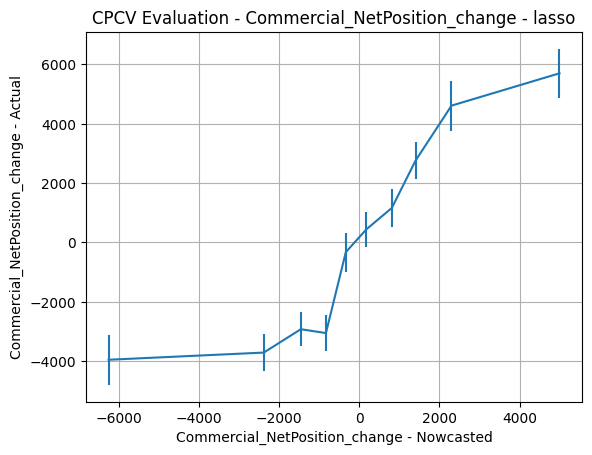

ridge: score=0.2278, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


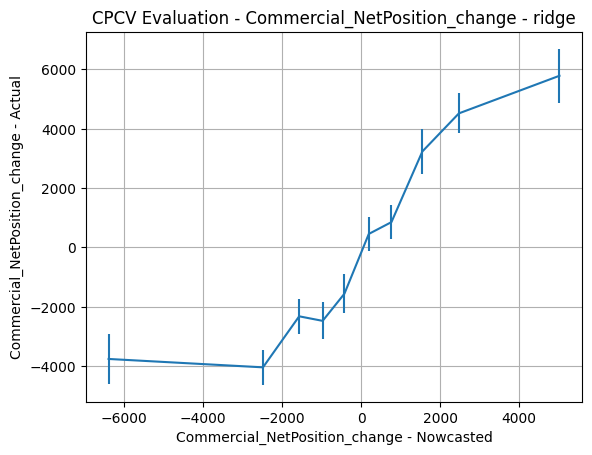

rf: score=0.4977, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}


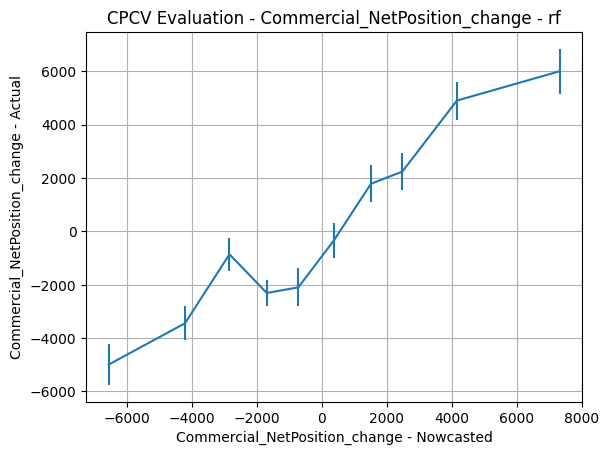

hgbm: score=0.3953, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 12, 'max_iter': 600, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 237}
{'learning_rate': 0.28792783392692833, 'max_depth': 12, 'max_iter': 600, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 237}


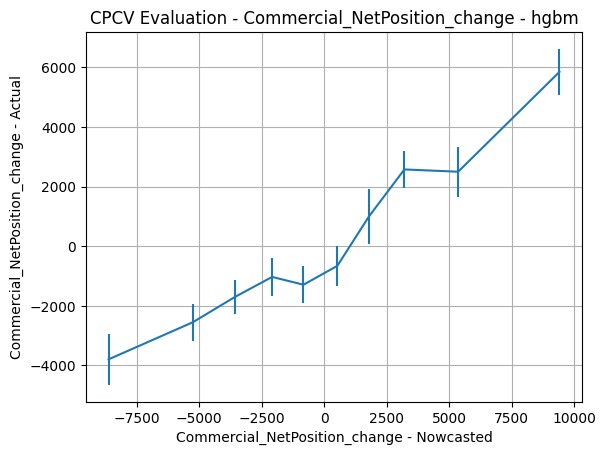

ols: score=0.2278, params={'model': 'ols'}
{}


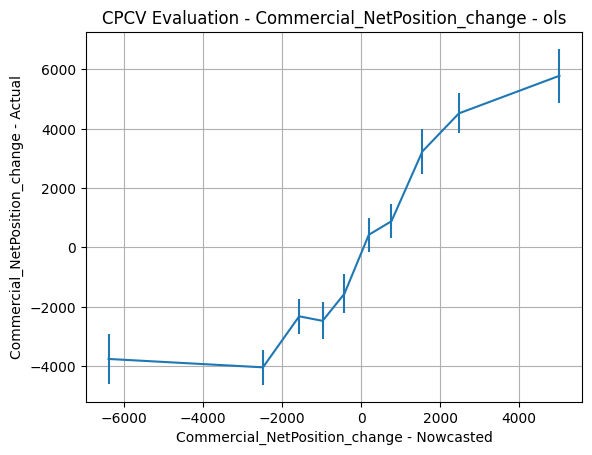

enet: score=0.1527, params={'model': 'enet', 'alpha': 0.0005542861384391507, 'l1_ratio': 0.5717066274798221, 'loss': 'huber', 'epsilon': 0.1543764104994202}
{'alpha': 0.0005542861384391507, 'l1_ratio': 0.5717066274798221, 'loss': 'huber', 'epsilon': 0.1543764104994202}


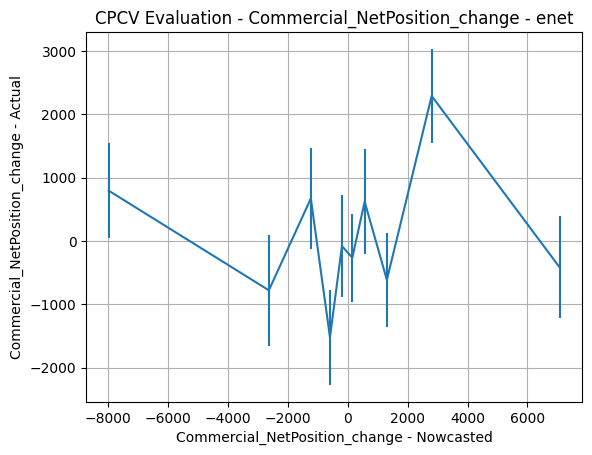

extra: score=0.4881, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}


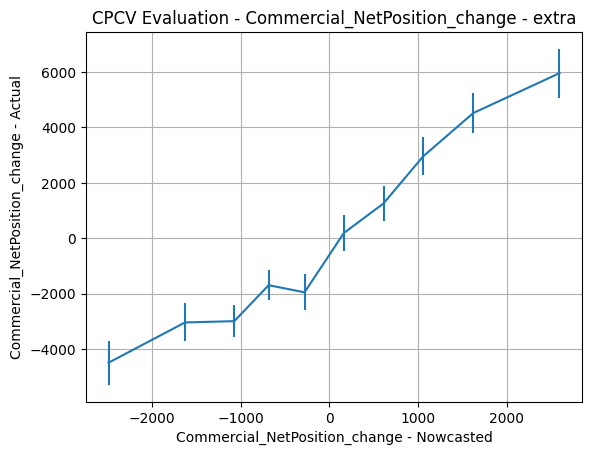

CommercialLongPosition_change
lasso: score=0.7421, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
{'alpha': 6.853298554875743e-05}


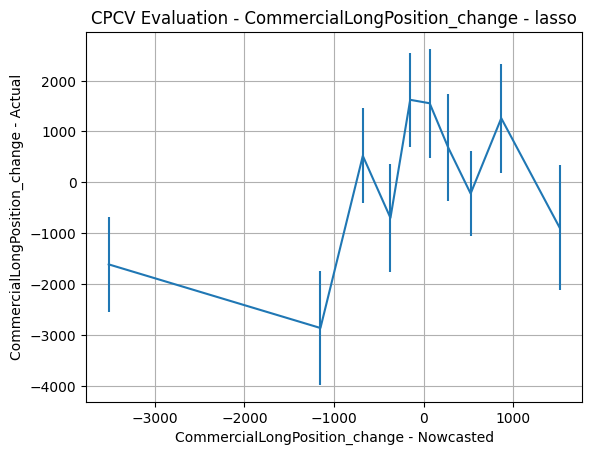

ridge: score=0.7421, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


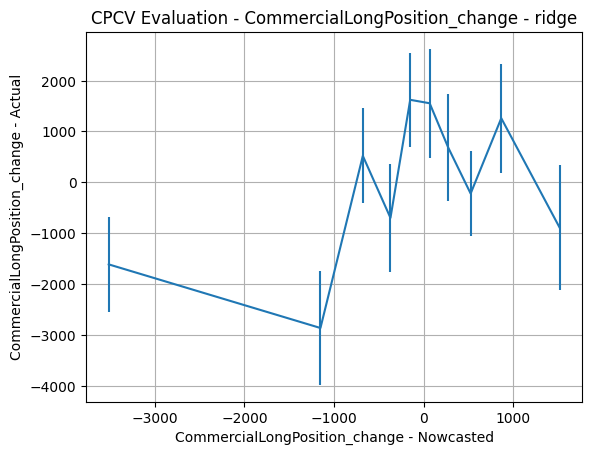

rf: score=0.7265, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}
{'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}


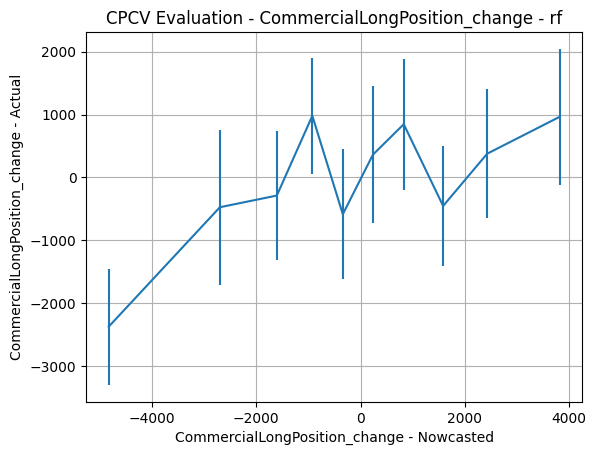

hgbm: score=0.6674, params={'model': 'hgbm', 'learning_rate': 0.24521420118020543, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.5351601141015567, 'max_leaf_nodes': 239}
{'learning_rate': 0.24521420118020543, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.5351601141015567, 'max_leaf_nodes': 239}


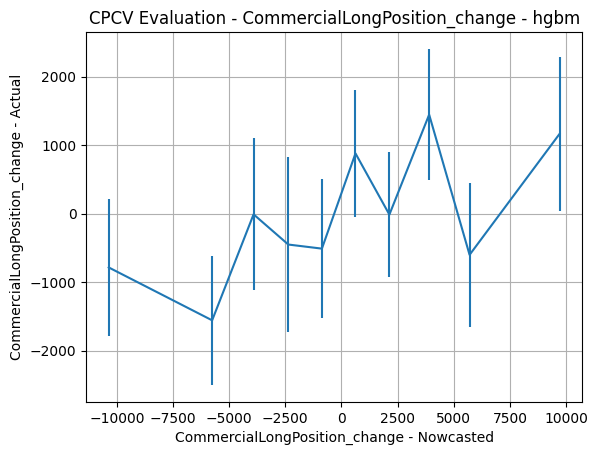

ols: score=0.7421, params={'model': 'ols'}
{}


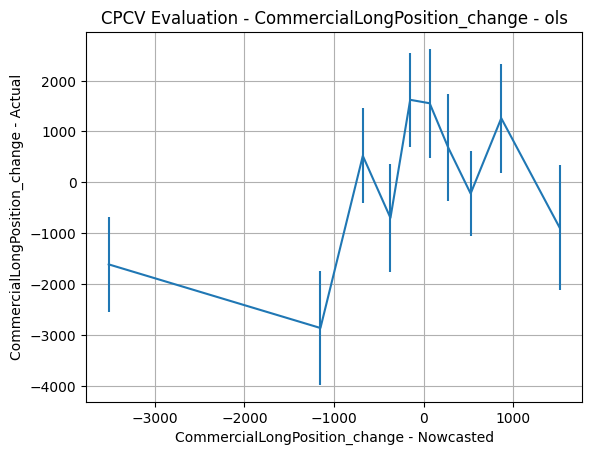

enet: score=0.7384, params={'model': 'enet', 'alpha': 1.3921501964558062e-06, 'l1_ratio': 0.1097090828921432, 'loss': 'huber', 'epsilon': 0.1998594019396708}
{'alpha': 1.3921501964558062e-06, 'l1_ratio': 0.1097090828921432, 'loss': 'huber', 'epsilon': 0.1998594019396708}


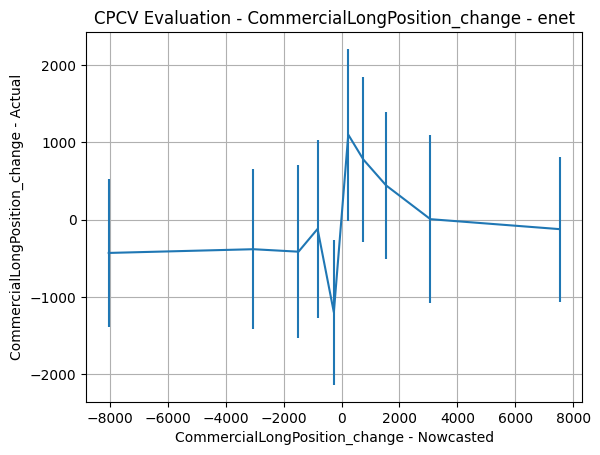

extra: score=0.7241, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


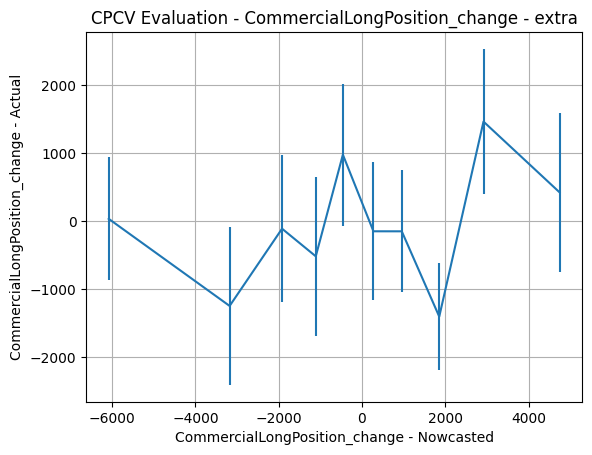

CommercialShortPosition_change
lasso: score=0.7131, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
{'alpha': 8.357633562224205e-06}


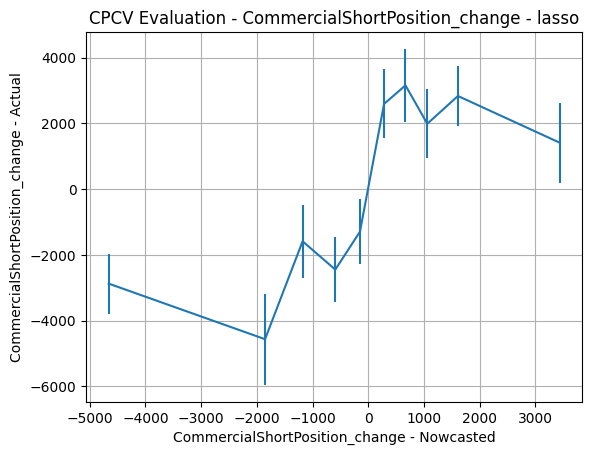

ridge: score=0.7026, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


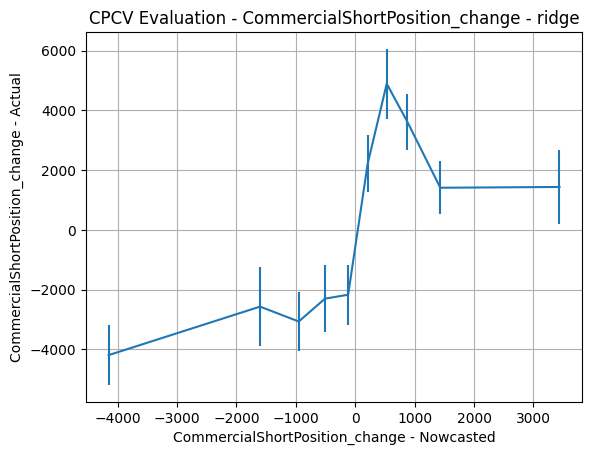

rf: score=0.7283, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


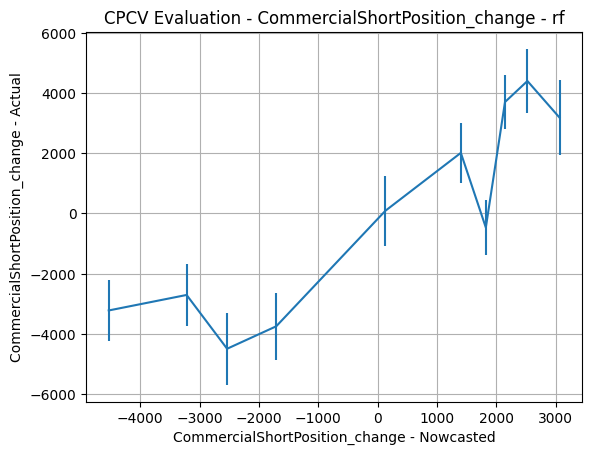

hgbm: score=0.6829, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


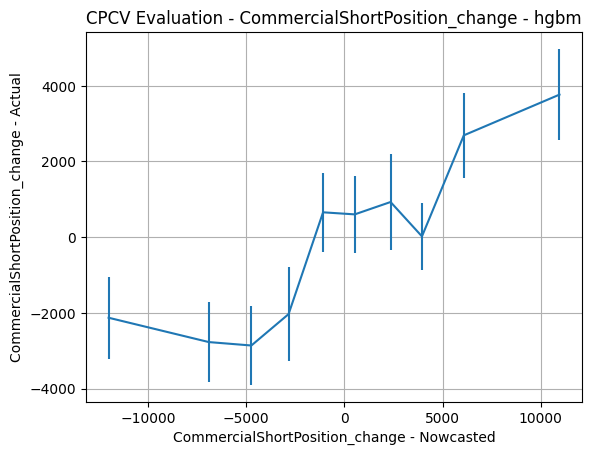

ols: score=0.7131, params={'model': 'ols'}
{}


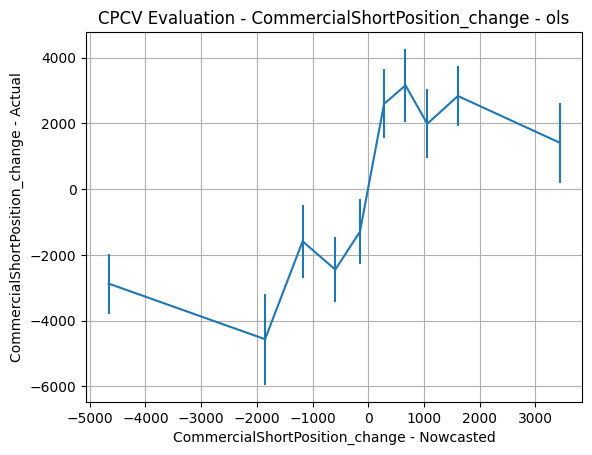

enet: score=0.6536, params={'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}
{'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}


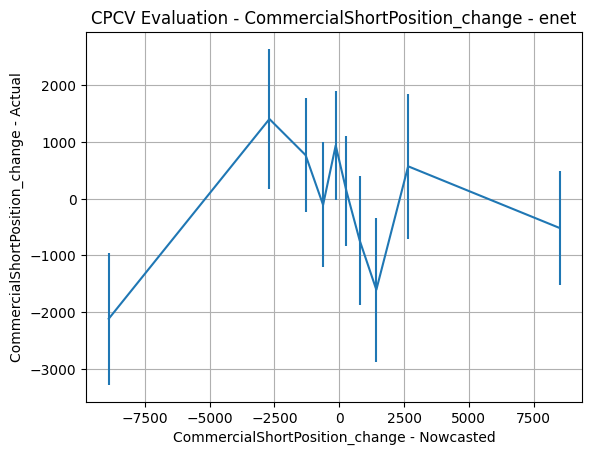

extra: score=0.7325, params={'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}


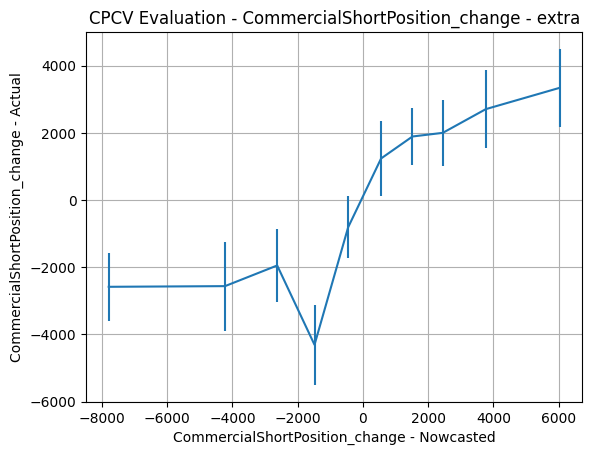

Commercial_NetPosition_to_openinterest_change
lasso: score=-0.0434, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


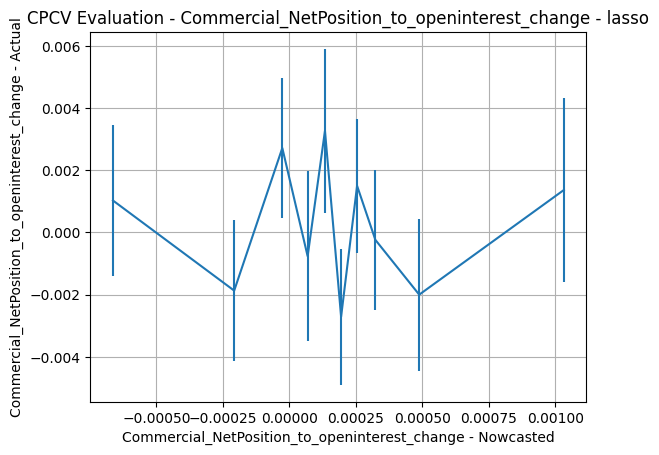

ridge: score=0.3521, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


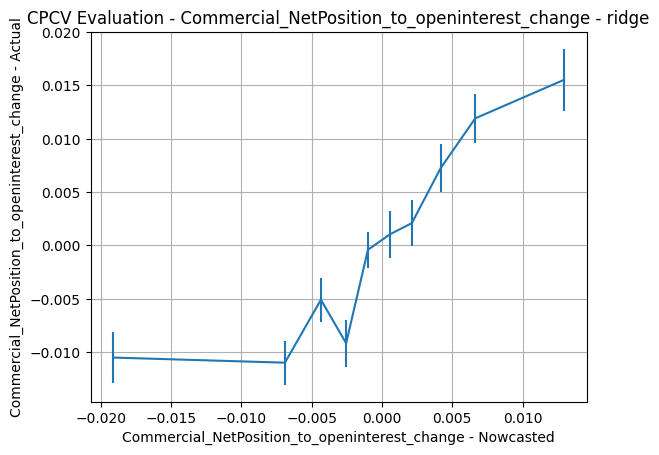

rf: score=0.5416, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}


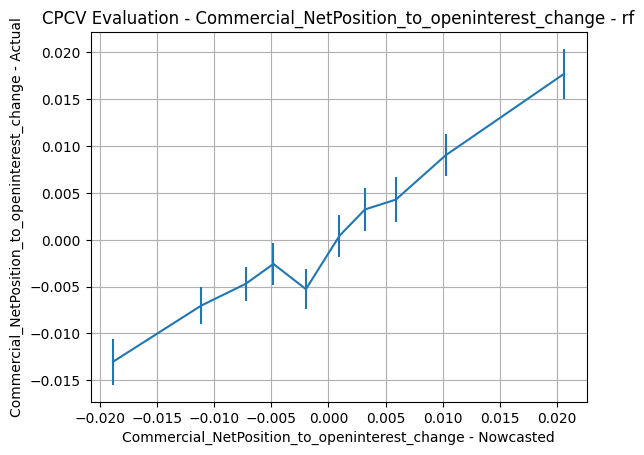

hgbm: score=0.5212, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


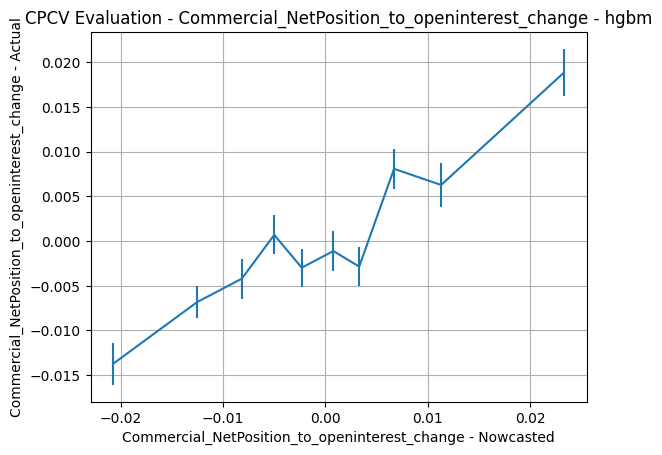

ols: score=0.3521, params={'model': 'ols'}
{}


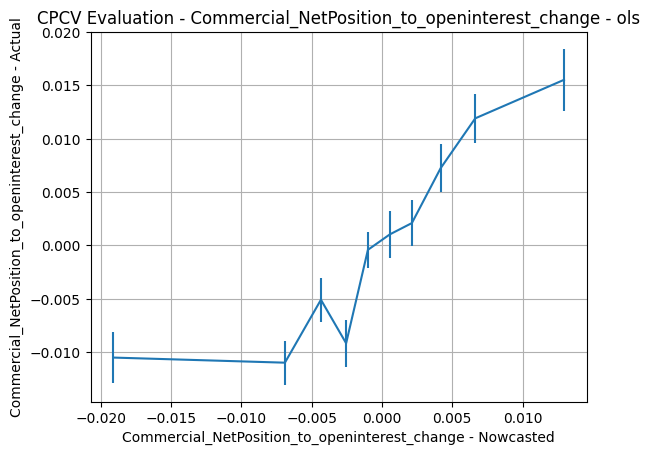

enet: score=0.2531, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


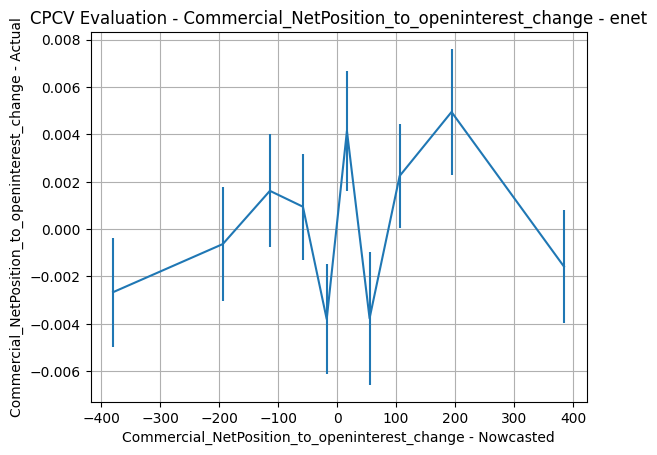

extra: score=0.4684, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


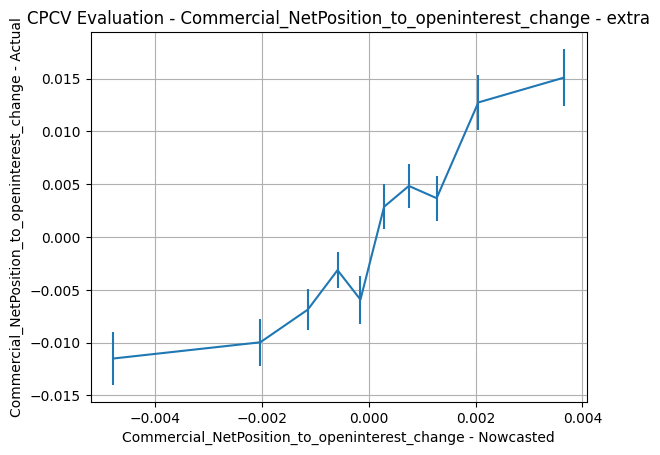

CommercialLongPosition_to_openinterest_change
lasso: score=-0.0372, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


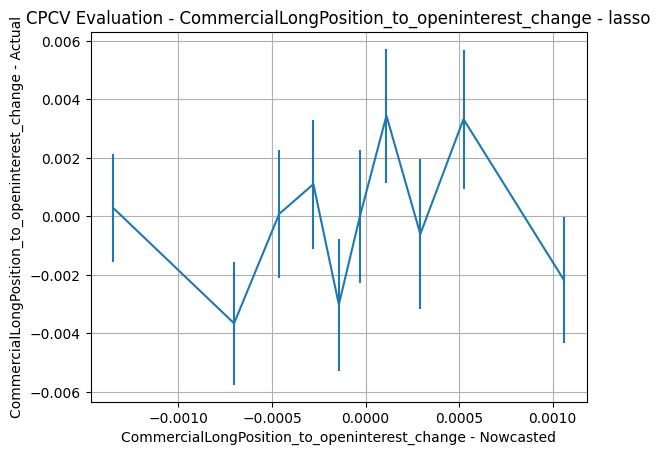

ridge: score=0.4822, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


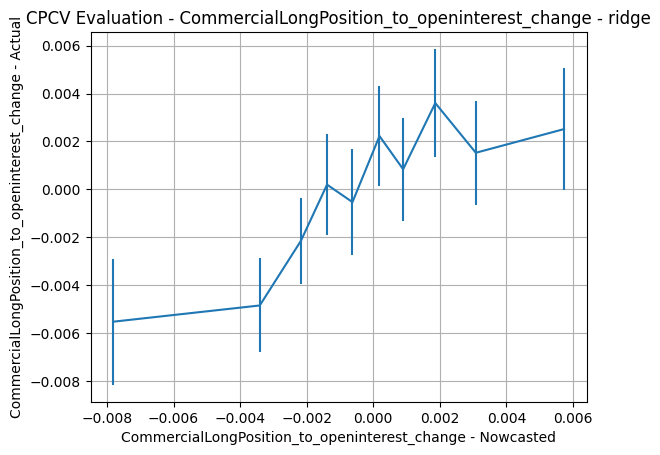

rf: score=0.4660, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}


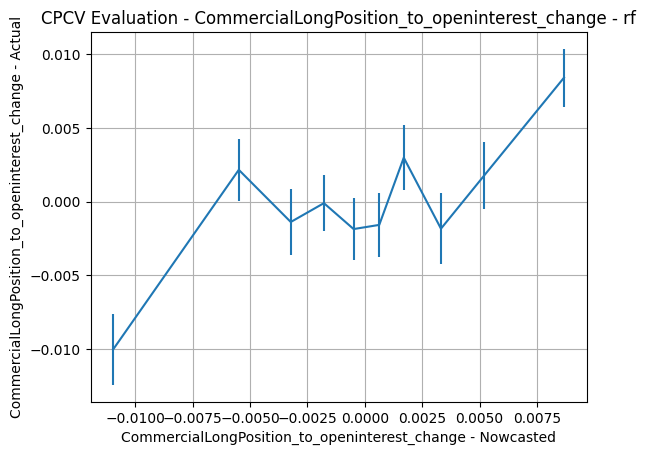

hgbm: score=0.3557, params={'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.547445763496463, 'max_leaf_nodes': 243}
{'learning_rate': 0.29899808614347523, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.547445763496463, 'max_leaf_nodes': 243}


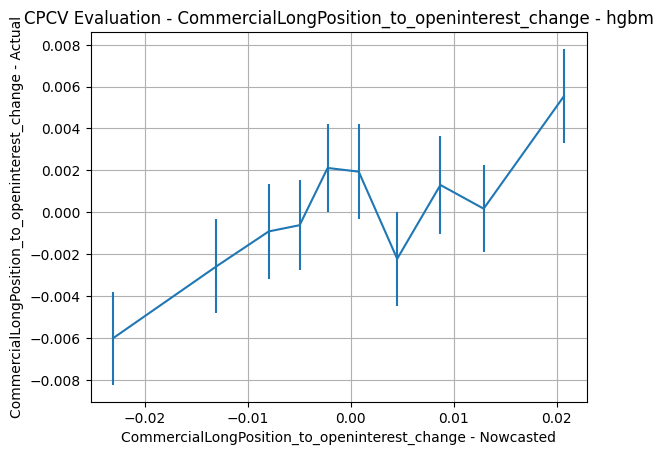

ols: score=0.4822, params={'model': 'ols'}
{}


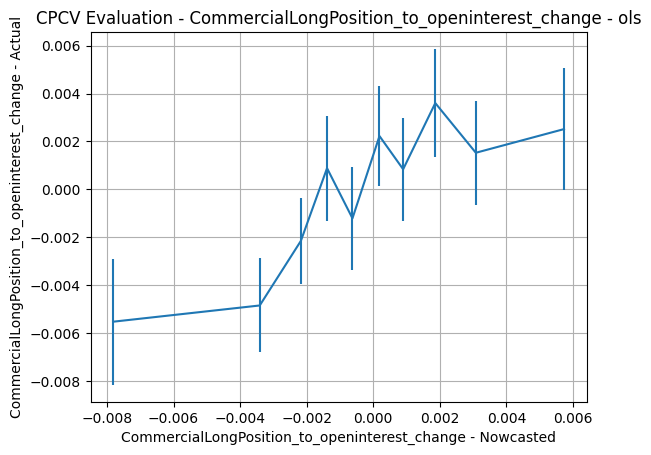

enet: score=-0.0348, params={'model': 'enet', 'alpha': 0.07572244075833429, 'l1_ratio': 0.5406128118274807, 'loss': 'squared_error'}
{'alpha': 0.07572244075833429, 'l1_ratio': 0.5406128118274807, 'loss': 'squared_error'}


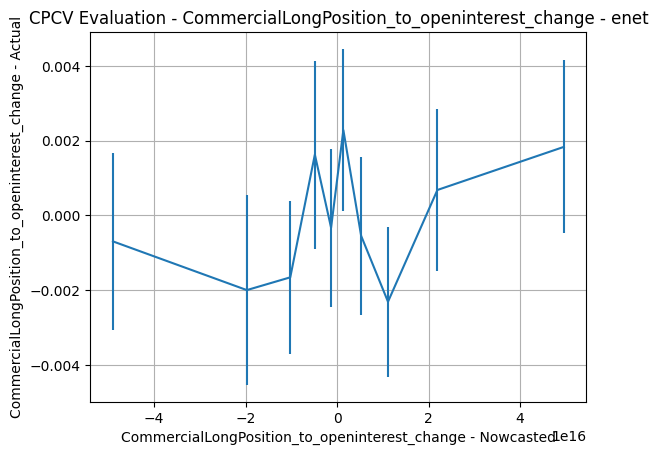

extra: score=0.4418, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


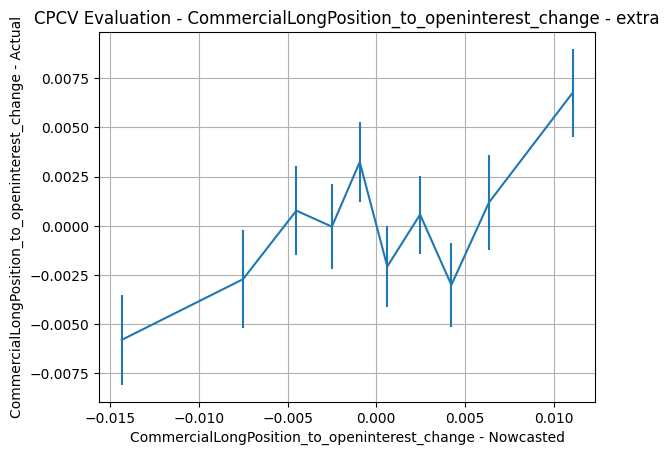

CommercialShortPosition_to_openinterest_change
lasso: score=-0.0481, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


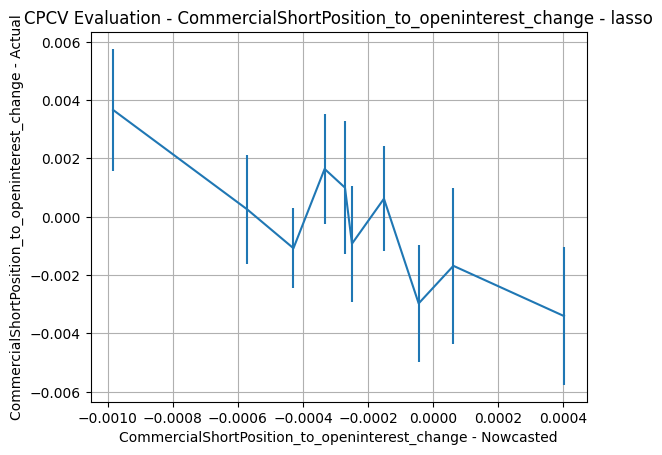

ridge: score=0.1217, params={'model': 'ridge', 'alpha': 933.6044419798662}
{'alpha': 933.6044419798662}


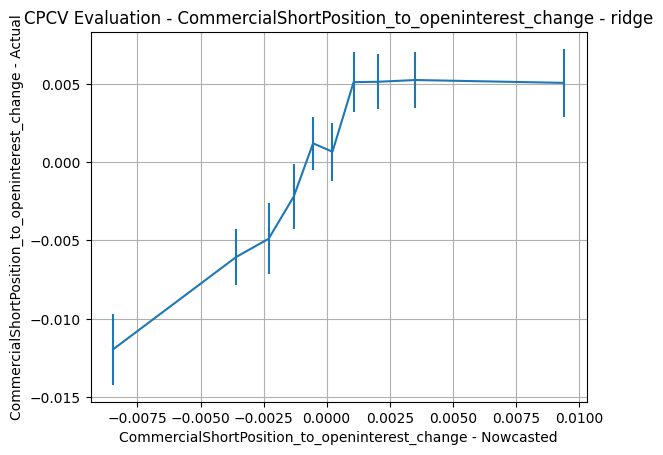

rf: score=0.2977, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


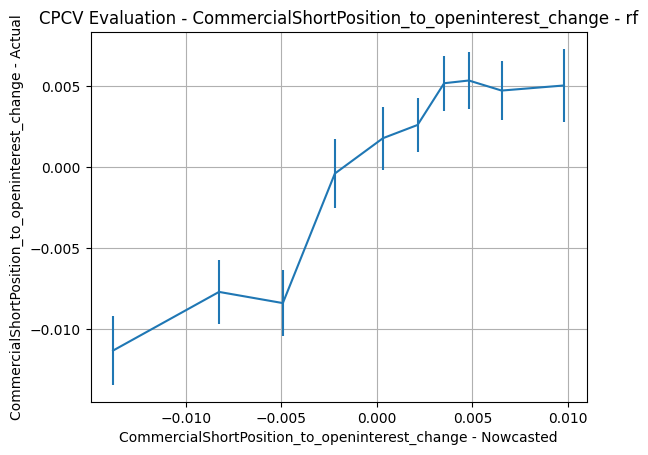

hgbm: score=0.2470, params={'model': 'hgbm', 'learning_rate': 0.19253329442084044, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6773208751463946, 'max_leaf_nodes': 67}
{'learning_rate': 0.19253329442084044, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6773208751463946, 'max_leaf_nodes': 67}


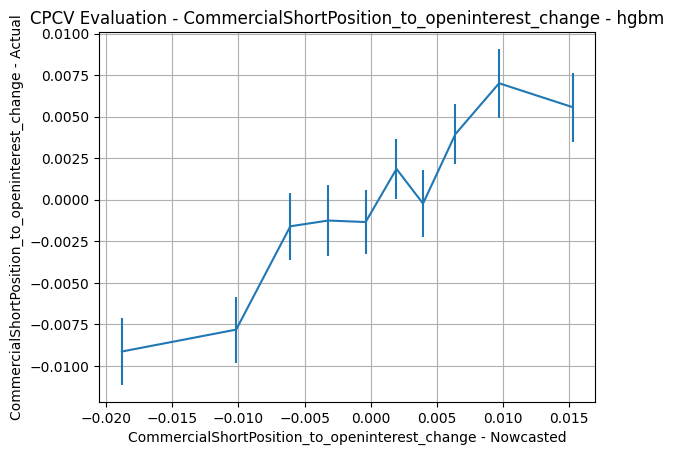

ols: score=0.1254, params={'model': 'ols'}
{}


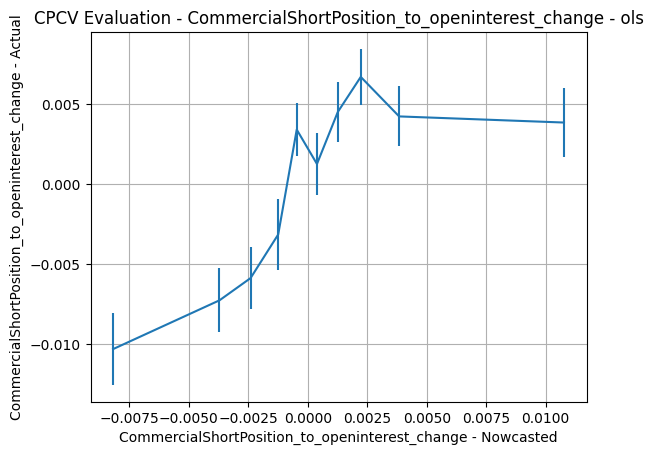

enet: score=-0.0211, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


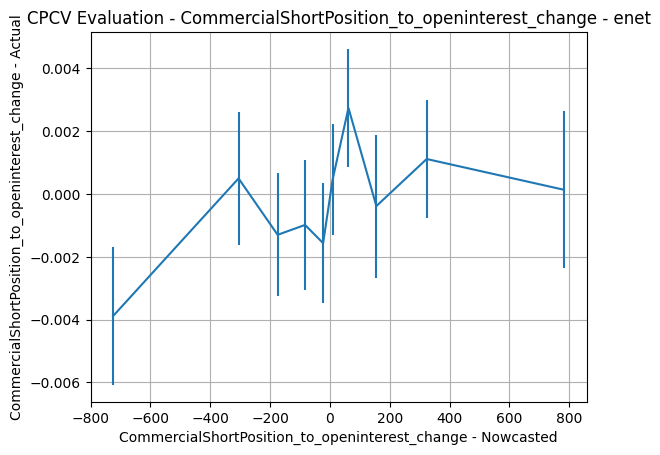

extra: score=0.2266, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


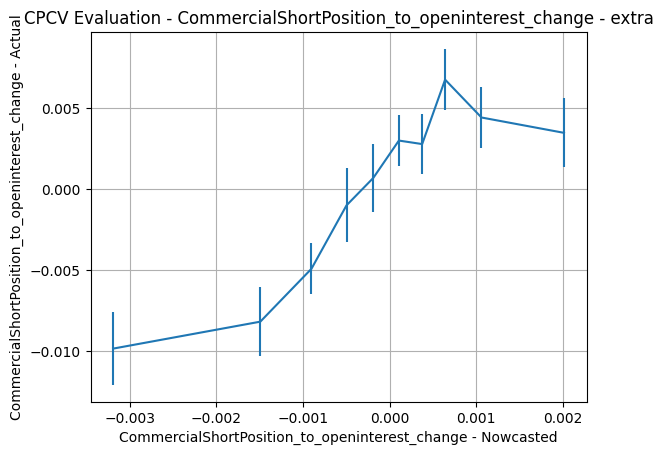

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
Commercial_NetPosition_change,0.282820,0.293495,0.474516,0.377319,0.293503,-0.017851,0.466402
CommercialLongPosition_change,0.066471,0.066482,0.094797,0.059823,0.066471,-0.013121,0.052963
CommercialShortPosition_change,0.108955,0.102577,0.279587,0.189102,0.108955,0.038837,0.201147
Commercial_NetPosition_to_openinterest_change,-0.053991,0.261932,0.376285,0.367402,0.261933,0.008357,0.323782
CommercialLongPosition_to_openinterest_change,-0.002945,0.143582,0.164320,0.114559,0.143575,0.018634,0.100302
CommercialShortPosition_to_openinterest_change,-0.096614,0.127708,0.300809,0.246994,0.125426,0.076780,0.227998


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

Commercial_NetPosition_change
{'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}
CommercialLongPosition_change
{'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}
CommercialShortPosition_change
{'n_estimators': 600, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Commercial_NetPosition_to_openinterest_change
{'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
CommercialLongPosition_to_openinterest_change
{'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}
CommercialShortPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


In [40]:
final_selected_model_and_parameters_per_response

{'Commercial_NetPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 25,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'CommercialLongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 800,
   'max_depth': 18,
   'min_samples_leaf': 4,
   'max_features': 'log2'}},
 'CommercialShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 3,
   'min_samples_leaf': 2,
   'max_features': 'sqrt'}},
 'Commercial_NetPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 12,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'CommercialLongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 23,
   'min_samples_leaf': 7,
   'max_features': 'log2'}},
 'CommercialShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 12,
   'min_samples_leaf

In [41]:
import json
with open("ho_cot_comm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)